<a href="https://colab.research.google.com/github/fferydooni/credit_card_churn/blob/main/credit_card_churn_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets --upgrade

install opendatasets libarary to download directly from Kaggle

In [ ]:
import numpy as np # For linear algebra operations
import pandas as pd # For data processing
import opendatasets as od
od.download('https://www.kaggle.com/datasets/anwarsan/credit-card-bank-churn') #Download data for Colab



In [ ]:
df= pd.read_csv('/content/credit-card-bank-churn/credit_card_churn.csv') #loading CVS file to data frame

In [ ]:
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [ ]:
df.shape # show dimensions of the data

(10127, 23)

In [ ]:
df.isnull().sum() # calculate number of nulls in each column

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [ ]:
df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
         'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2','CLIENTNUM'],
         axis=1,inplace=True) #Therefore, to lighten the processing operation and clarity of work, these columns have been removed

In [ ]:
# Outlier Detection

# Using Z-score to identify outliers
from scipy.stats import zscore


# Assuming 'df' is your DataFrame and it has been properly loaded

# Select numeric columns for outlier detection
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Calculate Z-scores
z_scores = np.abs(zscore(df[numeric_cols].fillna(0)))

# Identify outliers (Z-score > 3)
outliers = np.where(z_scores > 3)

# Create a DataFrame to show outliers
outliers_df = pd.DataFrame({
    'Column': [numeric_cols[i] for i in outliers[1]],
    'Row': outliers[0],
    'Z-Score': z_scores[outliers]
})

print(outliers_df.head())
print('Outlier detection completed')


In [ ]:
df.info() #show columns name and its type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [ ]:
df.describe() # show statistical summaries of the data

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [ ]:
pip install seaborn matplotlib

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
plt.figure(figsize=(20, 20))# Plotting boxplots for all numerical columns
for i, column in enumerate(df.select_dtypes(include=['int64', 'float64']).columns):
    plt.subplot(5, 4, i+1)  # Adjusting the grid to accommodate all columns
    sns.boxplot(y=df[column])
    plt.title(column)
    plt.tight_layout()

plt.show()

0   CLIENTNUM
1   Customer_Age
2   Dependent_count
3   Months_on_book
4   Total_Relationship_Count
5   Months_Inactive_12_mon
6   Contacts_Count_12_mon
7   Credit_Limit
8   Total_Revolving_Bal
9   Avg_Open_To_Buy
10   Total_Amt_Chng_Q4_Q1
11   Total_Trans_Amt
12   Total_Trans_Ct
13   Total_Ct_Chng_Q4_Q1
14   Avg_Utilization_Ratio
15   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1
16   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2


In [ ]:
pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 44.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
from sklearn.preprocessing import LabelEncoder
df_copy = df.copy() # Create a copy of df
le = LabelEncoder() # Create a LabelEncoder object

# Apply Label Encoding to each categorical column
for col in df_copy.columns:
    if df_copy[col].dtype == 'object':
        df_copy[col] = le.fit_transform(df_copy[col])
df_copy

In [ ]:
correlation_matrix = df_copy.corr() #Calculate correlations between columns
print(correlation_matrix)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Attrition_Flag,1.000000,-0.018203,0.037272,-0.018991,-0.005551,-0.018597,-0.017584,0.006038,-0.013687,0.150005,-0.152449,-0.204491,0.023873,0.263053,0.000285,0.131063,0.168598,0.371403,0.290054,0.178410
Customer_Age,-0.018203,1.000000,-0.017312,-0.122254,0.004083,-0.011265,-0.013474,-0.020131,0.788912,-0.010931,0.054361,-0.018452,0.002476,0.014780,0.001151,-0.062042,-0.046446,-0.067097,-0.012143,0.007114
Gender,0.037272,-0.017312,1.000000,0.004563,0.000694,-0.000007,-0.539731,0.079203,-0.006728,0.003157,-0.011163,0.039987,0.420806,0.029658,0.418059,0.026712,0.024890,-0.067454,-0.005800,-0.257851
Dependent_count,-0.018991,-0.122254,0.004563,1.000000,0.003788,0.000337,-0.035417,0.021674,-0.103062,-0.039076,-0.010768,-0.040505,0.068065,-0.002688,0.068291,-0.035439,0.025046,0.049912,0.011087,-0.037135
Education_Level,-0.005551,0.004083,0.000694,0.003788,1.000000,0.014720,-0.010442,-0.007212,-0.004953,0.009636,-0.008077,0.008500,0.003076,0.008029,0.002356,0.005534,0.015287,0.003046,0.007279,0.006477
Marital_Status,-0.018597,-0.011265,-0.000007,0.000337,0.014720,1.000000,0.009659,0.035947,-0.012084,-0.021393,0.001709,0.001476,0.031292,-0.025386,0.033562,-0.036210,0.044553,0.075888,0.000258,-0.027451
Income_Category,-0.017584,-0.013474,-0.539731,-0.035417,-0.010442,0.009659,1.000000,-0.051632,-0.016375,0.008138,0.024037,-0.018367,-0.225394,-0.025815,-0.223033,-0.004534,-0.014686,0.033498,0.014892,0.123287
Card_Category,0.006038,-0.020131,0.079203,0.021674,-0.007212,0.035947,-0.051632,1.000000,-0.014749,-0.073770,-0.016816,-0.000919,0.484090,0.017027,0.482462,0.004061,0.176377,0.116579,-0.004541,-0.205089
Months_on_book,-0.013687,0.788912,-0.006728,-0.103062,-0.004953,-0.012084,-0.016375,-0.014749,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.048959,-0.038591,-0.049819,-0.014072,-0.007541
Total_Relationship_Count,0.150005,-0.010931,0.003157,-0.039076,0.009636,-0.021393,0.008138,-0.073770,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,0.050119,-0.347229,-0.241891,0.040831,0.067663


In [ ]:
df_copy['Attrition_Flag'].unique()
for x in df_copy['Attrition_Flag']:
  print(type(x))

array([1, 0])

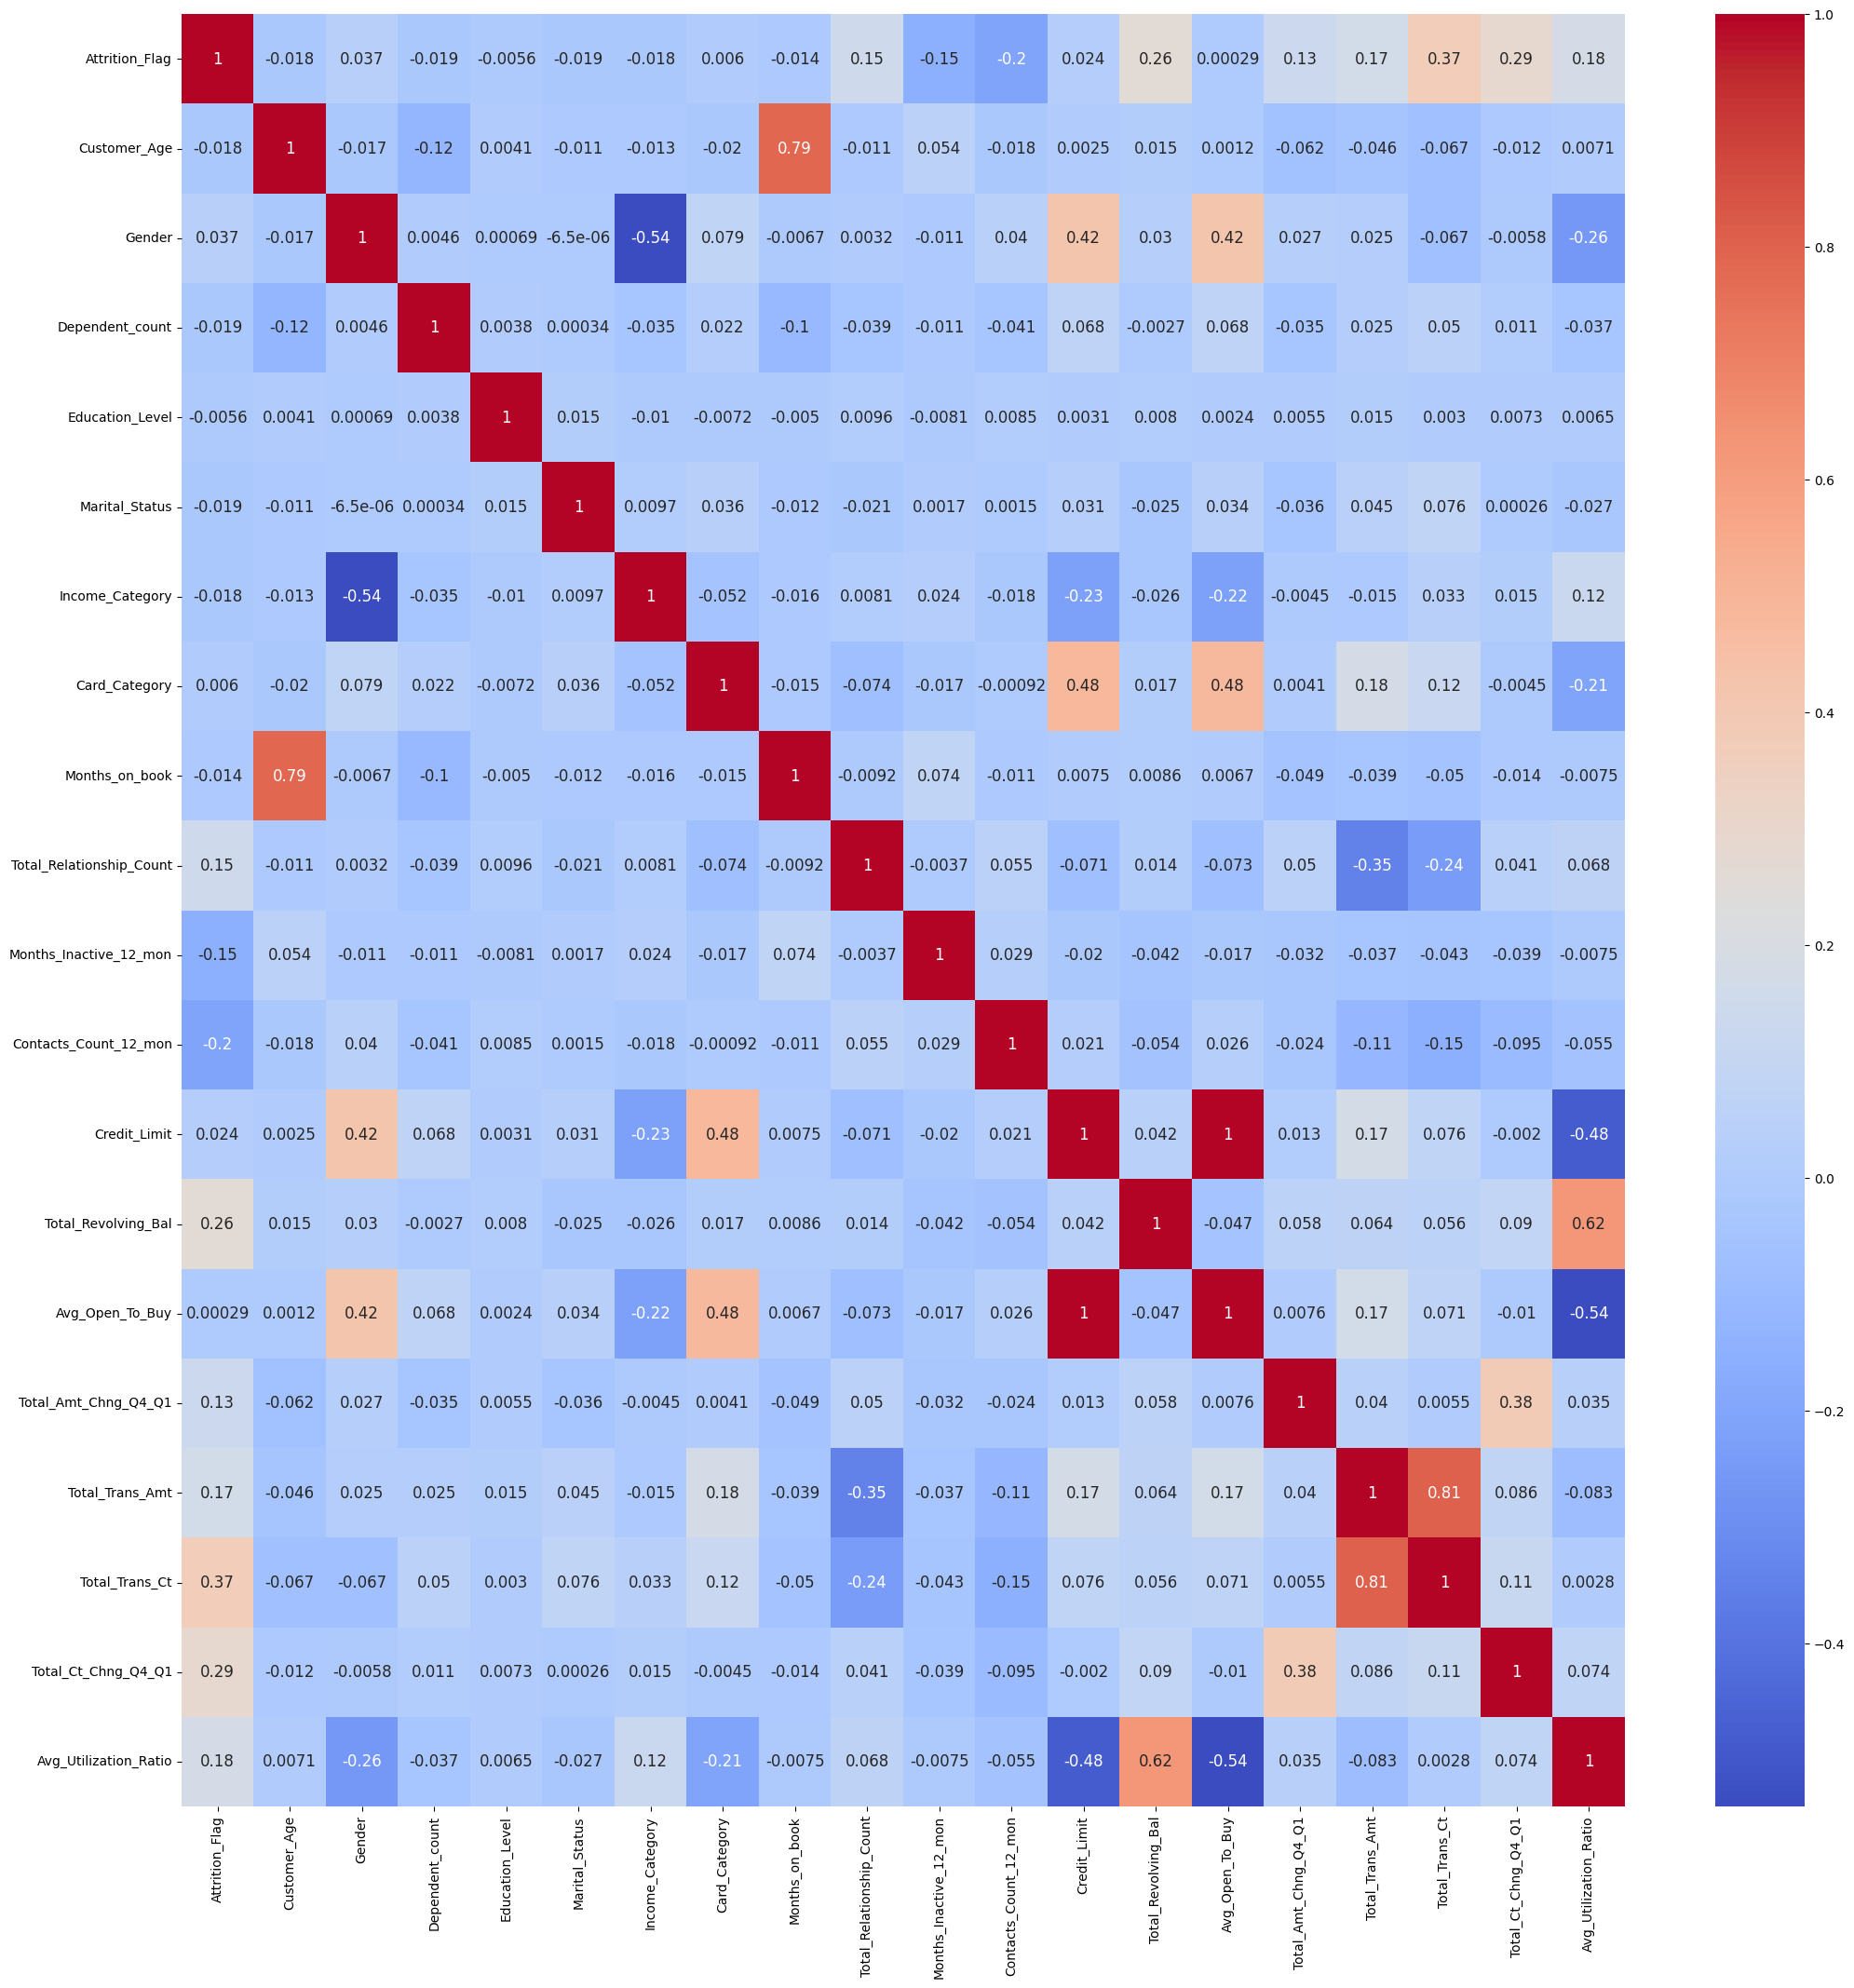

In [ ]:

plt.figure(figsize=(25, 25)) # Set the size of the figure
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',annot_kws={"size": 12}) # Create a heatmap
plt.xticks(fontsize=10)
plt.yticks(fontsize=10) # Increase the size of the labels on the x-axis and y-axis
plt.show() # Display the heatmap

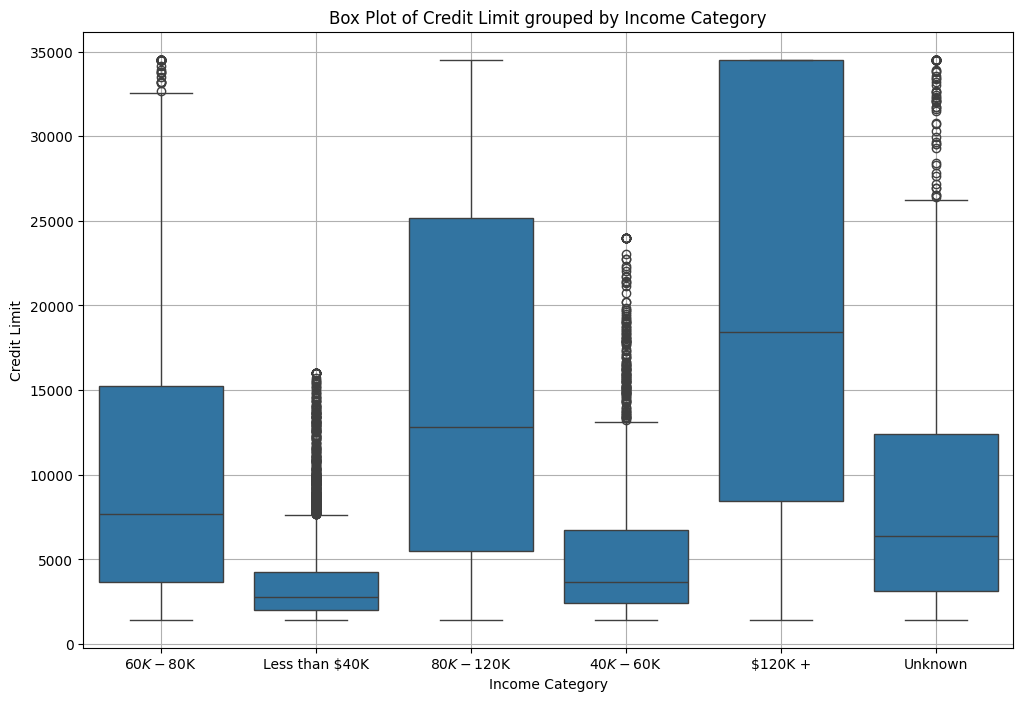

In [ ]:
# BoxPlot 1: Credit_Limit grouped by Income_Category
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Income_Category', y='Credit_Limit')
plt.title('Box Plot of Credit Limit grouped by Income Category')
plt.xlabel('Income Category')
plt.ylabel('Credit Limit')
plt.grid(True)
plt.show()

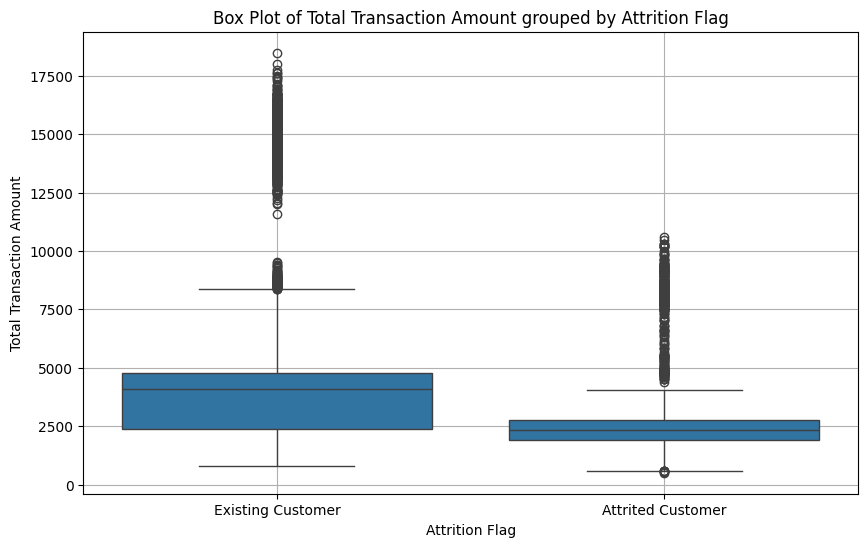

In [ ]:
# BoxPlot 2: Total_Trans_Amt grouped by Attrition_Flag
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Attrition_Flag', y='Total_Trans_Amt')
plt.title('Box Plot of Total Transaction Amount grouped by Attrition Flag')
plt.xlabel('Attrition Flag')
plt.ylabel('Total Transaction Amount')
plt.grid(True)
plt.show()

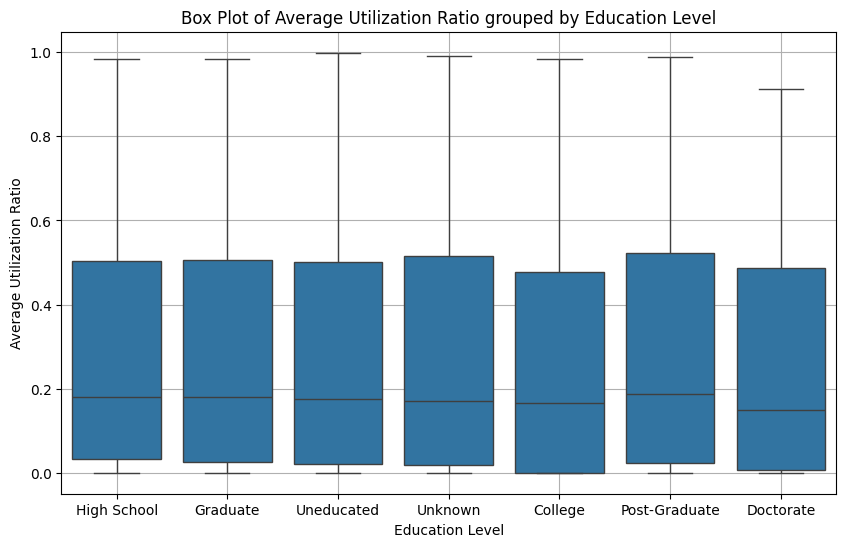

In [ ]:
# BoxPlot 3: Avg_Utilization_Ratio grouped by Education_Level
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Education_Level', y='Avg_Utilization_Ratio')
plt.title('Box Plot of Average Utilization Ratio grouped by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Utilization Ratio')
plt.grid(True)
plt.show()

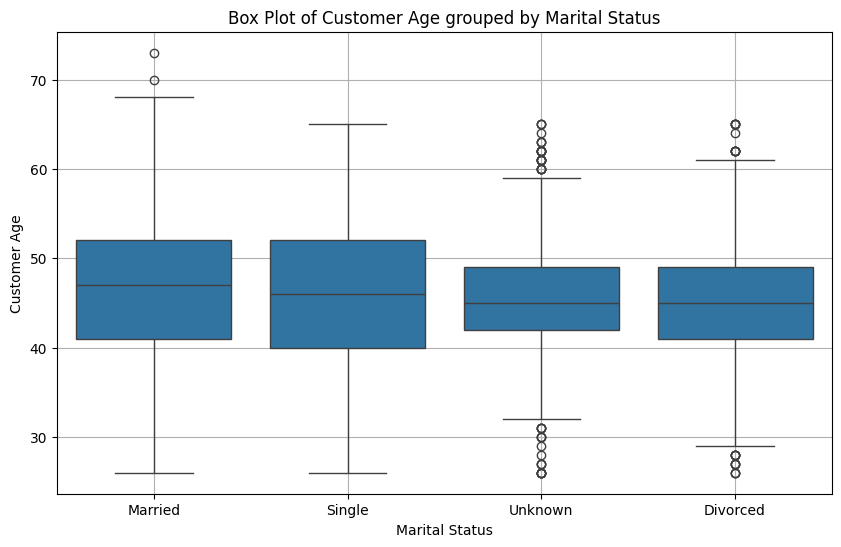

In [ ]:
# BoxPlot 4: Customer_Age grouped by Marital_Status
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Marital_Status', y='Customer_Age')
plt.title('Box Plot of Customer Age grouped by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Customer Age')
plt.grid(True)
plt.show()

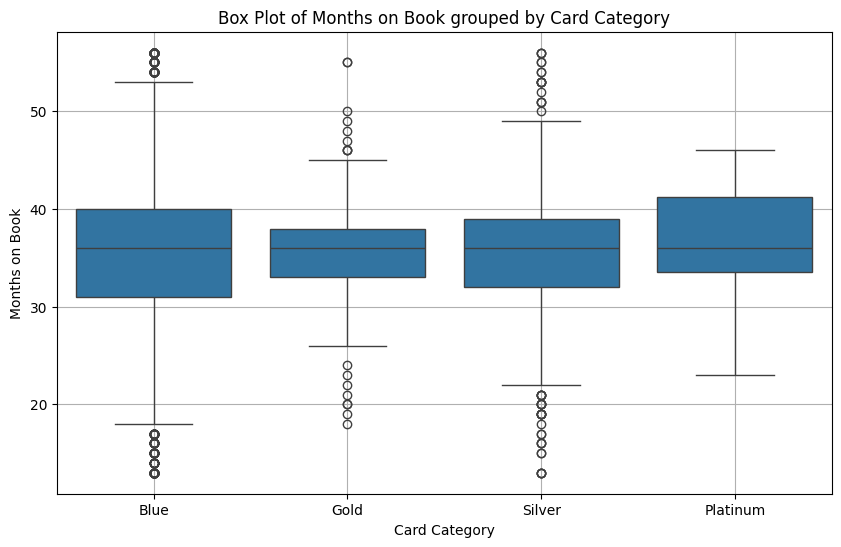

In [ ]:
# BoxPlot 5: Months_on_book grouped by Card_Category
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Card_Category', y='Months_on_book')
plt.title('Box Plot of Months on Book grouped by Card Category')
plt.xlabel('Card Category')
plt.ylabel('Months on Book')
plt.grid(True)
plt.show()

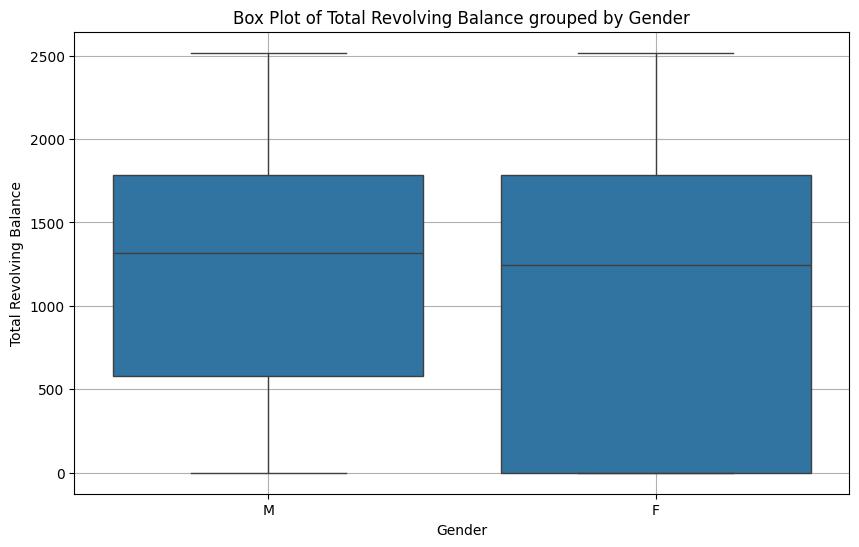

In [ ]:
# BoxPlot 6: Total_Revolving_Bal grouped by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Gender', y='Total_Revolving_Bal')
plt.title('Box Plot of Total Revolving Balance grouped by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Revolving Balance')
plt.grid(True)
plt.show()

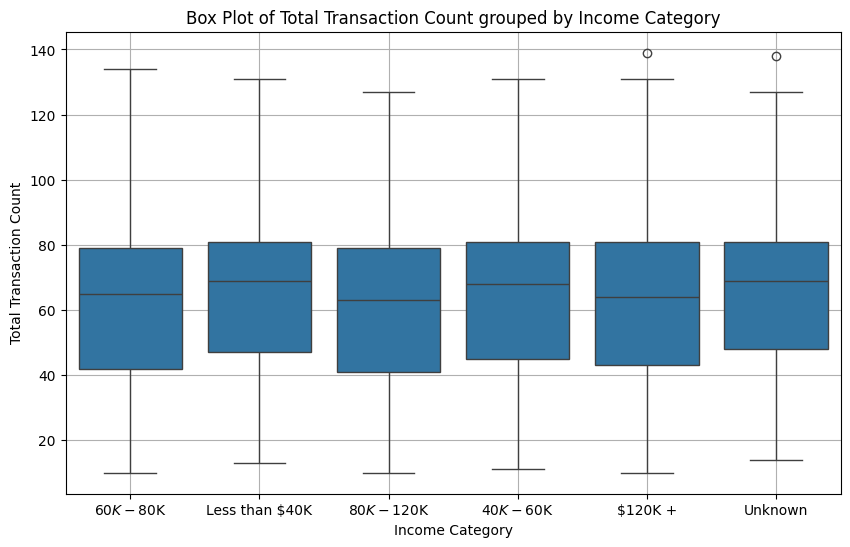

In [ ]:
# BoxPlot 7: Total_Trans_Ct grouped by Income_Category
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Income_Category', y='Total_Trans_Ct')
plt.title('Box Plot of Total Transaction Count grouped by Income Category')
plt.xlabel('Income Category')
plt.ylabel('Total Transaction Count')
plt.grid(True)
plt.show()

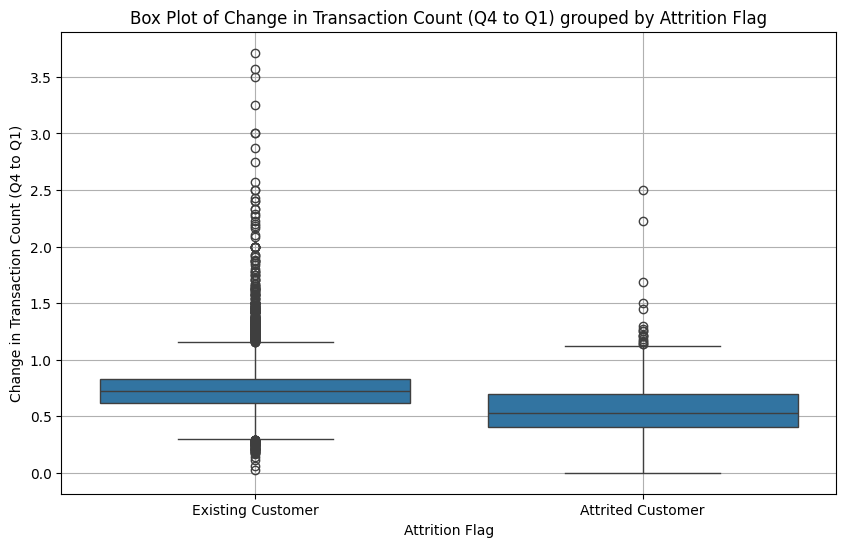

In [ ]:
# Box Plot: Total_Ct_Chng_Q4_Q1 grouped by Attrition_Flag
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Attrition_Flag', y='Total_Ct_Chng_Q4_Q1')
plt.title('Box Plot of Change in Transaction Count (Q4 to Q1) grouped by Attrition Flag')
plt.xlabel('Attrition Flag')
plt.ylabel('Change in Transaction Count (Q4 to Q1)')
plt.grid(True)
plt.show()

In [ ]:
# Cross-tabulation of Attrition Flag vs. Gender
cross_tab_gender = pd.crosstab(df['Attrition_Flag'], df['Gender'], margins=True)
print(cross_tab_gender)

Gender                F     M    All
Attrition_Flag                      
Attrited Customer   930   697   1627
Existing Customer  4428  4072   8500
All                5358  4769  10127


In [ ]:
# Cross-tabulation of Attrition Flag vs. Education Level
cross_tab_education = pd.crosstab(df['Attrition_Flag'], df['Education_Level'], margins=True)
print(cross_tab_education)

Education_Level    College  Doctorate  Graduate  High School  Post-Graduate  \
Attrition_Flag                                                                
Attrited Customer      154         95       487          306             92   
Existing Customer      859        356      2641         1707            424   
All                   1013        451      3128         2013            516   

Education_Level    Uneducated  Unknown    All  
Attrition_Flag                                 
Attrited Customer         237      256   1627  
Existing Customer        1250     1263   8500  
All                      1487     1519  10127  


In [ ]:
# Cross-tabulation of Card Category vs. Income Category
cross_tab_card_income = pd.crosstab(df['Card_Category'], df['Income_Category'], margins=True)
print(cross_tab_card_income)

Income_Category  $120K +  $40K - $60K  $60K - $80K  $80K - $120K  \
Card_Category                                                      
Blue                 645         1675         1273          1395   
Gold                  18           15           29            21   
Platinum               4            1            4             2   
Silver                60           99           96           117   
All                  727         1790         1402          1535   

Income_Category  Less than $40K  Unknown    All  
Card_Category                                    
Blue                       3403     1045   9436  
Gold                         24        9    116  
Platinum                      4        5     20  
Silver                      130       53    555  
All                        3561     1112  10127  


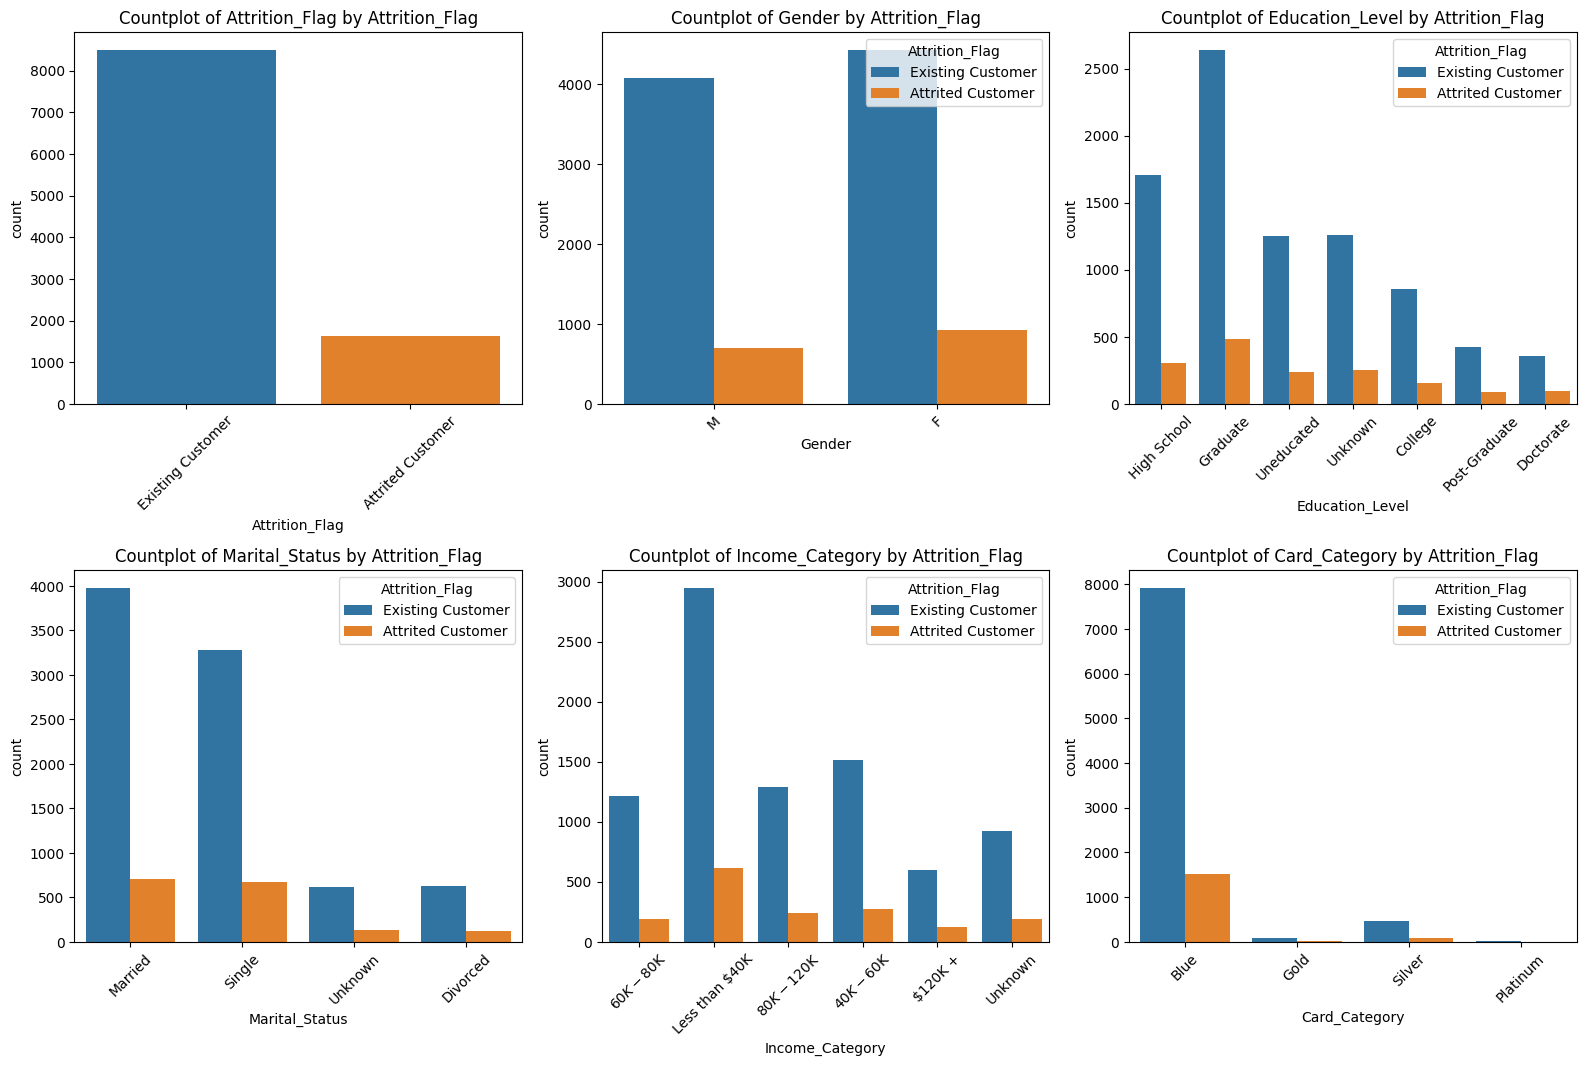

In [ ]:
categorical_columns = df.select_dtypes(include='object').columns
plt.figure(figsize=(16, 15))
for i, column in enumerate(categorical_columns,1):
  plt.subplot(3, 3, i)
  sns.countplot(x=column, hue='Attrition_Flag', data=df)
  plt.title(f'Countplot of {column} by Attrition_Flag')
  plt.xticks(rotation=45)
plt.tight_layout()
plt.show()  # Added line to explicitly display the plot

In [ ]:
# Get the first 12 columns
columns = df_copy.columns[:]
columns = columns.delete(columns.get_loc('Attrition_Flag'))
unique_flags =df_copy['Attrition_Flag'].unique()
for column in columns:
    # Create a barplot for each column
    plt.figure(figsize=(10, 6))
    sns.barplot(x="Attrition_Flag", y=column, data=df_scaled)

    # Set plot title
    plt.title(f'Bar plot for {column}')

    # Show the plot
    plt.show()

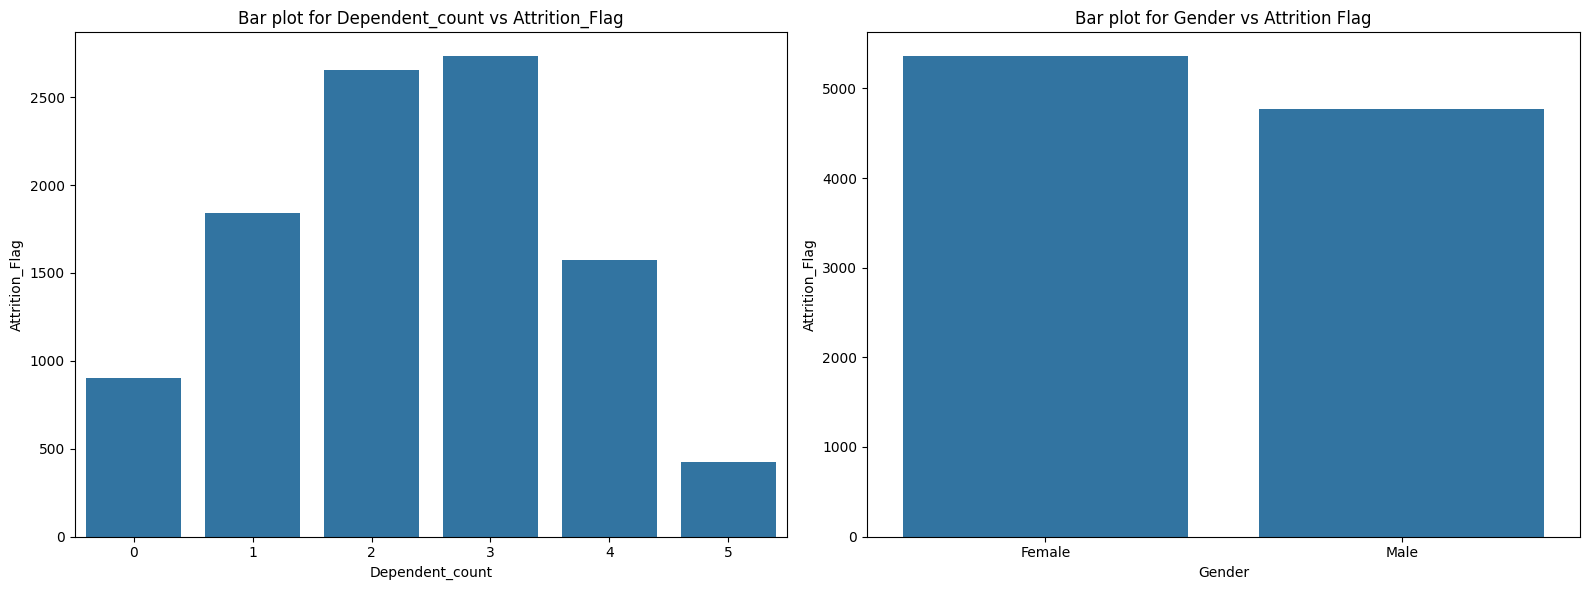

In [ ]:
# Create a figure with one row and two columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Customer Age vs Attrition Flag
sns.barplot(x="Dependent_count", y="Attrition_Flag", data=df_copy, estimator=len, ax=axes[0])
axes[0].set_title('Bar plot for Dependent_count vs Attrition_Flag')


# # Subset x-axis ticks and labels for plot 1
# axes[0].set_xticks(desired_ages)
# axes[0].set_xticklabels(desired_ages)  # Optional: set custom labels if needed

# Plot 2: Gender vs Attrition Flag (remains unchanged)
sns.barplot(x="Gender", y="Attrition_Flag", data=df_copy, estimator=len, ax=axes[1])
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Female', 'Male'])
axes[1].set_title('Bar plot for Gender vs Attrition Flag')

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined plot
plt.show()

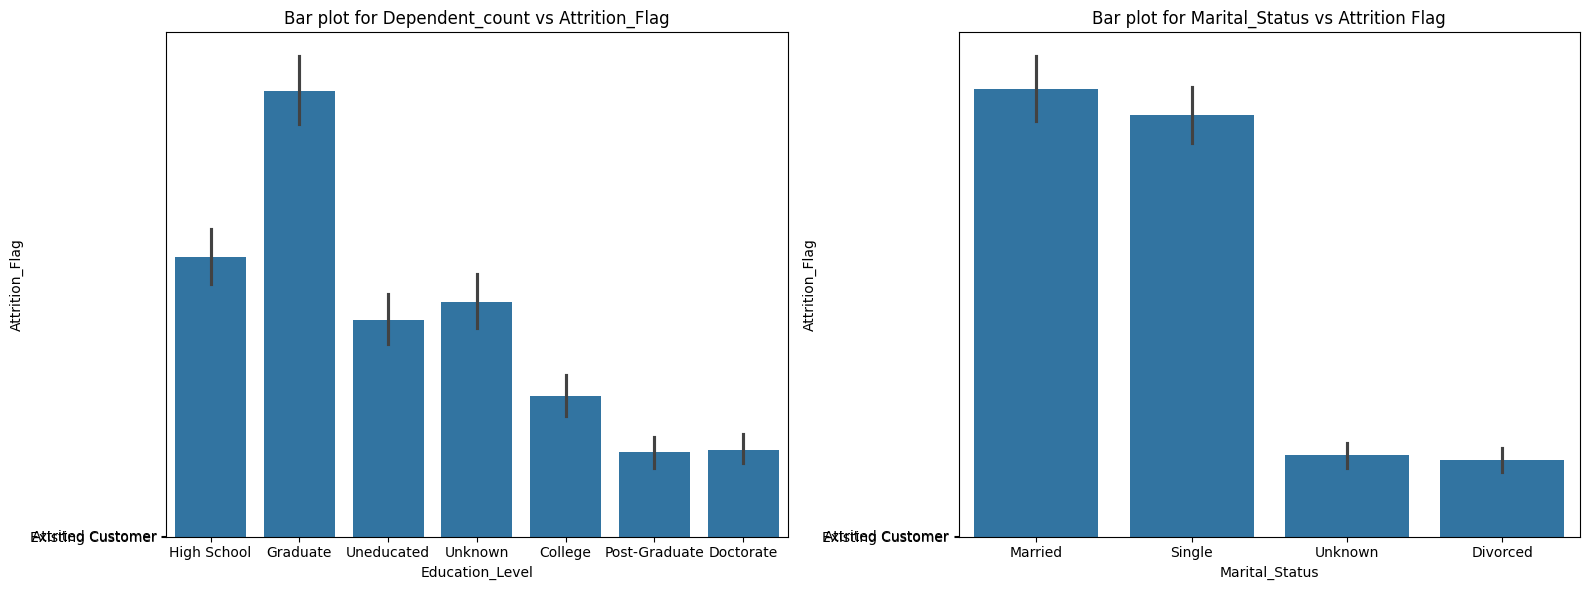

In [ ]:
# Create a figure with one row and two columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Education_Level vs Attrition Flag
sns.barplot(x="Education_Level", y="Attrition_Flag", data=df, estimator='sum', ax=axes[0])
axes[0].set_title('Bar plot for Education_Level vs Attrition_Flag')
axes[0].invert_yaxis()  # Corrected line to invert y-axis

# Plot 2: Marital_Status vs Attrition Flag
sns.barplot(x="Marital_Status", y="Attrition_Flag", data=df, estimator='sum', ax=axes[1])
axes[1].invert_yaxis()  # Corrected line to invert y-axis
axes[1].set_title('Bar plot for Marital_Status vs Attrition Flag')

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined plot
plt.show()

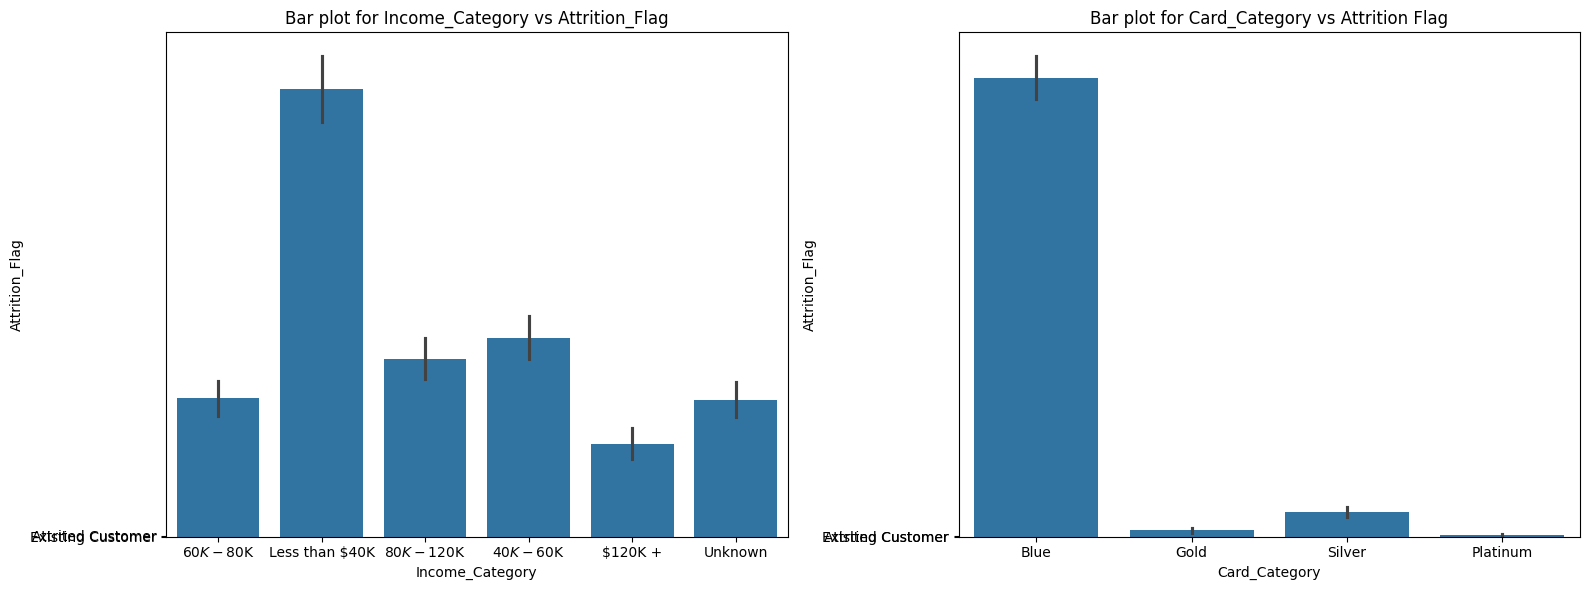

In [ ]:
# Create a figure with one row and two columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Income_Category vs Attrition Flag
sns.barplot(x="Income_Category", y="Attrition_Flag", data=df, estimator='sum', ax=axes[0])
axes[0].set_title('Bar plot for Income_Category vs Attrition_Flag')
axes[0].invert_yaxis()  # Corrected line to invert y-axis

# Plot 2: Card_Category vs Attrition Flag
sns.barplot(x="Card_Category", y="Attrition_Flag", data=df, estimator='sum', ax=axes[1])
axes[1].invert_yaxis()  # Corrected line to invert y-axis
axes[1].set_title('Bar plot for Card_Category vs Attrition Flag')

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined plot
plt.show()

In [ ]:
# Create a figure with one row and two columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Income_Category vs Attrition Flag
sns.barplot(x="Income_Category", y="Attrition_Flag", data=df, estimator='sum', ax=axes[0])
axes[0].set_title('Bar plot for Income_Category vs Attrition_Flag')
axes[0].invert_yaxis()  # Corrected line to invert y-axis

# Plot 2: Card_Category vs Attrition Flag
sns.barplot(x="Card_Category", y="Attrition_Flag", data=df, estimator='sum', ax=axes[1])
axes[1].invert_yaxis()  # Corrected line to invert y-axis
axes[1].set_title('Bar plot for Card_Category vs Attrition Flag')

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined plot
plt.show()

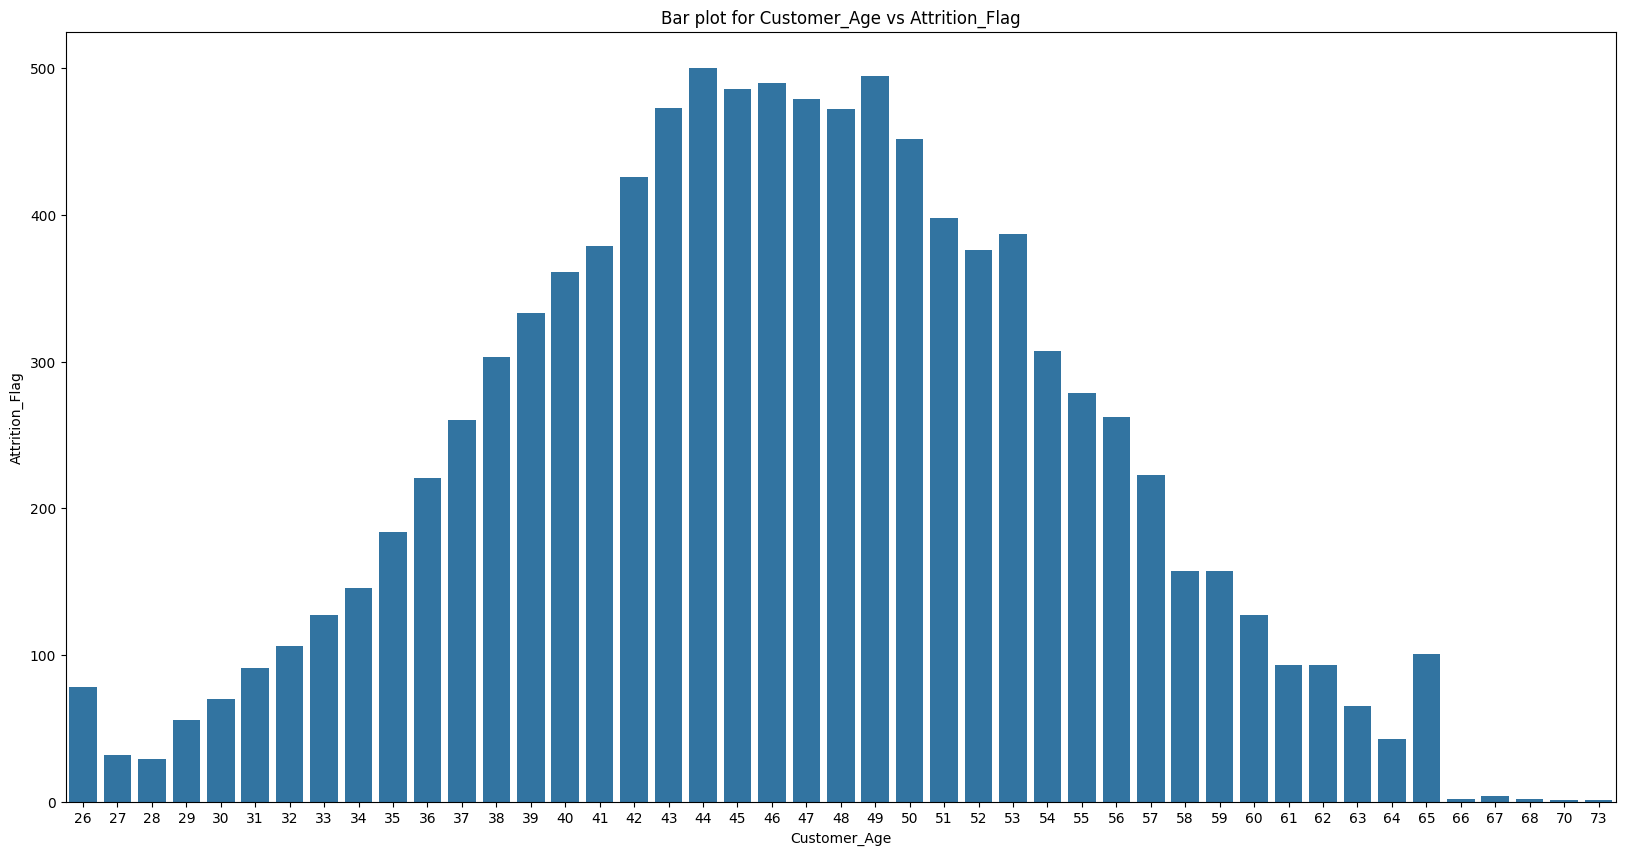

In [ ]:
# Create a barplot
plt.figure(figsize=(20, 10))
sns.barplot(x="Customer_Age", y="Attrition_Flag", data=df_copy, estimator=len)

# Set plot title
plt.title('Bar plot for Customer_Age vs Attrition_Flag')

plt.show()

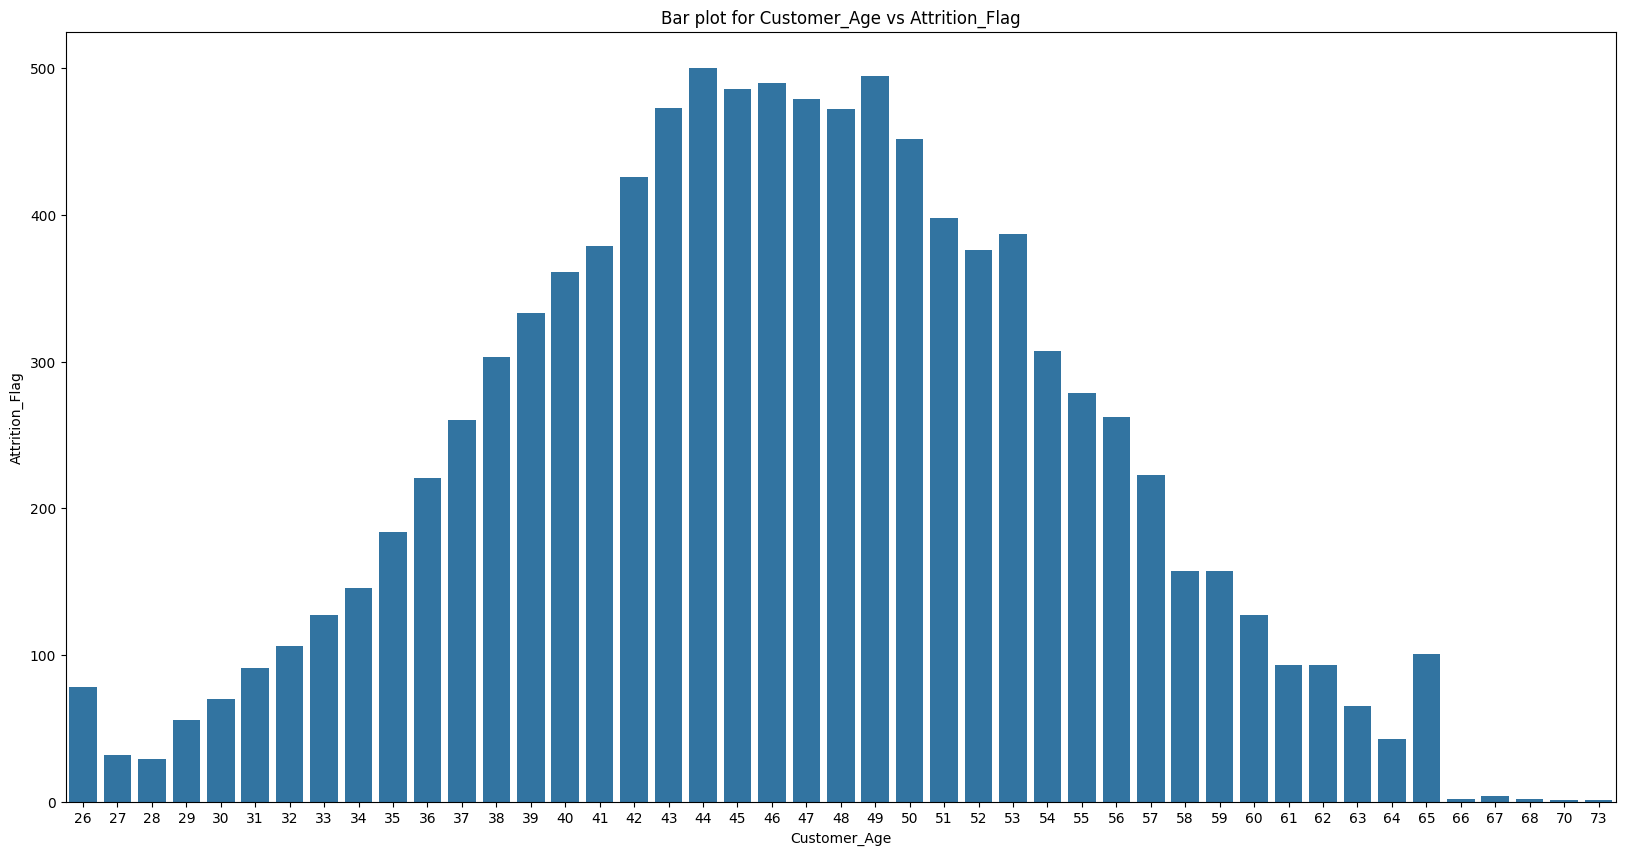

In [ ]:




# Create a barplot
plt.figure(figsize=(10, 6))
sns.barplot(x="Months_on_book", y="Attrition_Flag", data=df, estimator='sum')

# Invert y-axis
plt.gca().invert_yaxis()

# Set plot title
plt.title('Bar plot for Months_on_book vs Attrition_Flag')

# Show the plot
plt.show()
#-------------
#بعدا درست شود
df.columns = df.columns.str.strip()

#sns.lineplot(x="Months_on_book", y="Attrition_Flag", data=df, estimator='sum',ci=None)
#temp_df=df.groupby("Months_on_book")["Attrition_Flag"].sum()
#print(temp_df.index.tolist()) #تبدیل به لیست شده مرحله بعد باید یک تابع پدید برای رسم پیدا کنم
#print(temp_df.iloc[0:5, temp_df.columns[0]])

plt.figure(figsize=(25, 15))
sns.lineplot(x="Months_on_book", y="Attrition_Flag", data=df.groupby("Months_on_book")["Attrition_Flag"].sum(), ci=None)
plt.gca().invert_yaxis()
# Set plot title
plt.title('Line chart for Months_on_book vs Attrition_Flag')
plt.xticks(ticks=df['Months_on_book'], labels=df['Months_on_book'])  # List all x-axis values
plt.yticks(ticks=df["Attrition_Flag"], labels=df["Attrition_Flag"], rotation=45)
# Show the plot
plt.show()
#------
grouped_data = df.groupby('Months_on_book')['Attrition_Flag'].sum().reset_index()

# Create the line plot
plt.figure(figsize=(10, 6))  # Adjust the figsize as needed
sns.lineplot(x='Months_on_book', y='Attrition_Flag', data=grouped_data)

# Customize plot labels and title
plt.xlabel('Months_on_book')
plt.ylabel('Sum of Attrition_Flag')
plt.title('Line chart: Sum of Attrition_Flag vs Months_on_book')



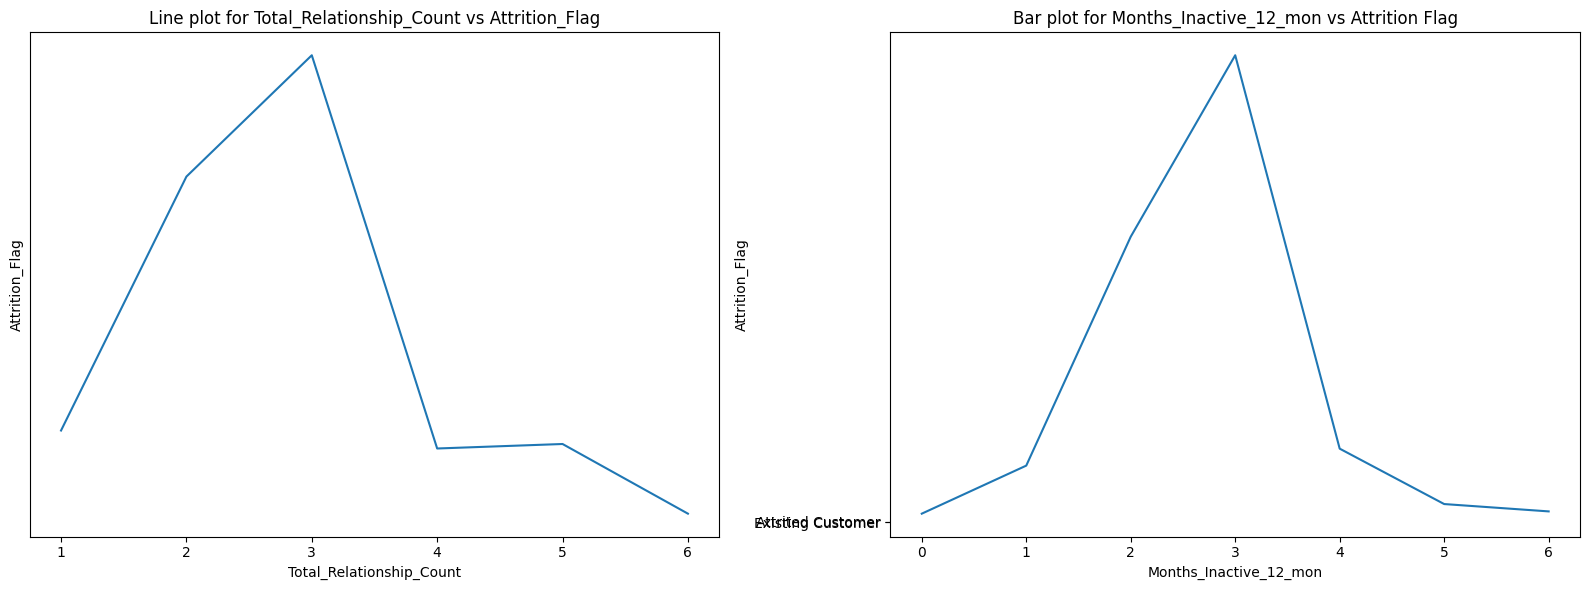

In [ ]:
# Create a figure with one row and two columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Total_Relationship_Count vs Attrition Flag
sns.lineplot(x="Total_Relationship_Count", y="Attrition_Flag", data=df, estimator='sum', errorbar=None, ax=axes[0])
axes[0].set_title('Line plot for Total_Relationship_Count vs Attrition_Flag')
axes[0].invert_yaxis()  # Corrected line to invert y-axis

# Plot 2: Months_Inactive_12_mon vs Attrition Flag
sns.lineplot(x="Months_Inactive_12_mon", y="Attrition_Flag", data=df, estimator='sum', errorbar=None, ax=axes[1])
axes[1].invert_yaxis()  # Corrected line to invert y-axis
axes[1].set_title('Bar plot for Months_Inactive_12_mon vs Attrition Flag')

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined plot
plt.show()

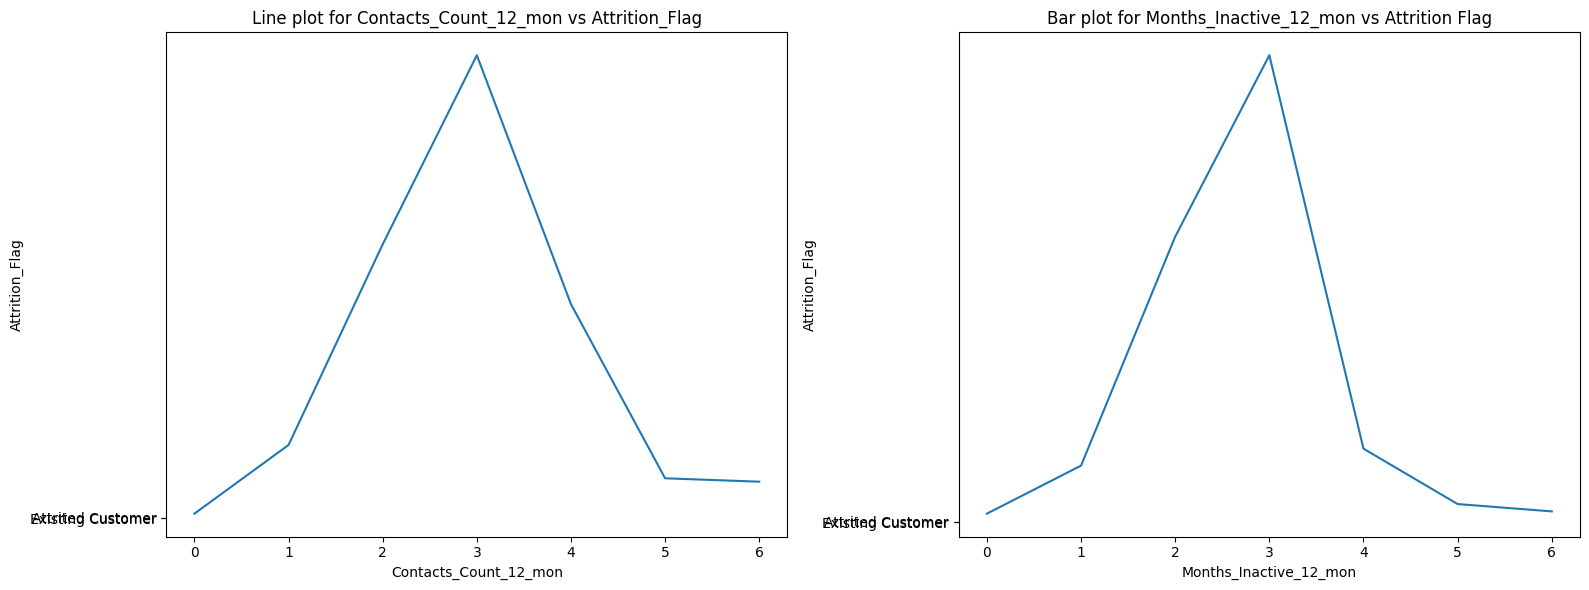

In [ ]:
# Create a figure with one row and two columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Total_Contacts_Count_12_mon vs Attrition Flag
sns.lineplot(x="Contacts_Count_12_mon", y="Attrition_Flag", data=df, estimator='sum', errorbar=None, ax=axes[0])
axes[0].set_title('Line plot for Contacts_Count_12_mon vs Attrition_Flag')
axes[0].invert_yaxis()  # Corrected line to invert y-axis

# Plot 2: Months_Inactive_12_mon vs Attrition Flag
sns.lineplot(x="Months_Inactive_12_mon", y="Attrition_Flag", data=df, estimator='sum', errorbar=None, ax=axes[1])
axes[1].invert_yaxis()  # Corrected line to invert y-axis
axes[1].set_title('Bar plot for Months_Inactive_12_mon vs Attrition Flag')

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined plot
plt.show()

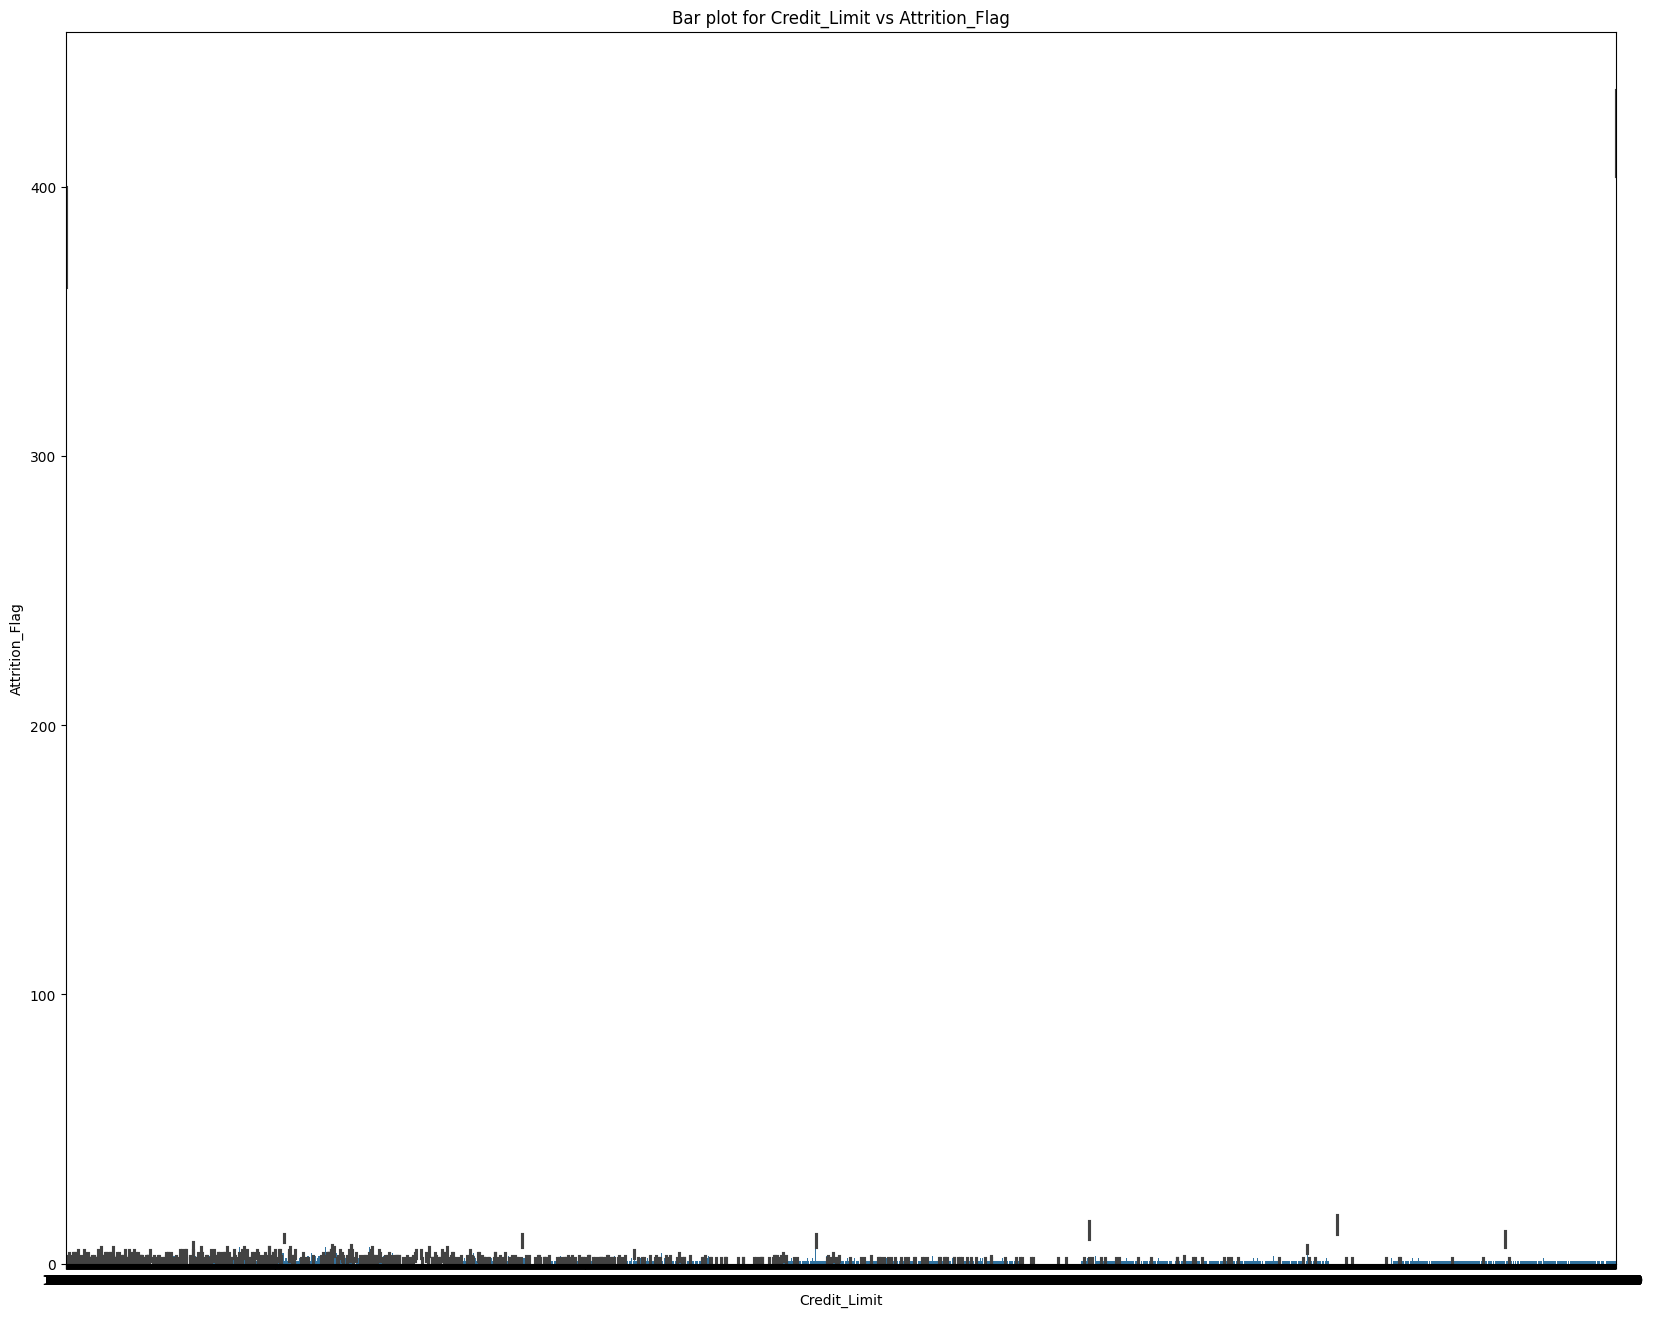

In [ ]:

#-----
# Create a barplot Credit_Limit مجدد بازبینی شود
plt.figure(figsize=(20, 16))

sns.barplot(x="Credit_Limit", y="Attrition_Flag", data=df_copy, estimator='sum')

# Invert y-axis
#plt.gca().invert_yaxis()

# Set plot title
plt.title('Bar plot for Credit_Limit vs Attrition_Flag')

# Show the plot
plt.show()
# Plotting the box plot for 'Credit_Limit' grouped by 'Attrition_Flag' تست
# plt.figure(figsize=(12, 8), facecolor='white')
# sns.boxplot(data=df_copy, x='Attrition_Flag', y='Credit_Limit')
# plt.title('Box Plot of Credit Limit grouped by Attrition Flag')
# plt.xlabel('Attrition Flag')
# plt.ylabel('Credit Limit')
# #plt.grid(True)
# plt.show()


Text(0.5, 1.0, 'Bar plot for Total_Revolving_Bal vs Attrition_Flag')

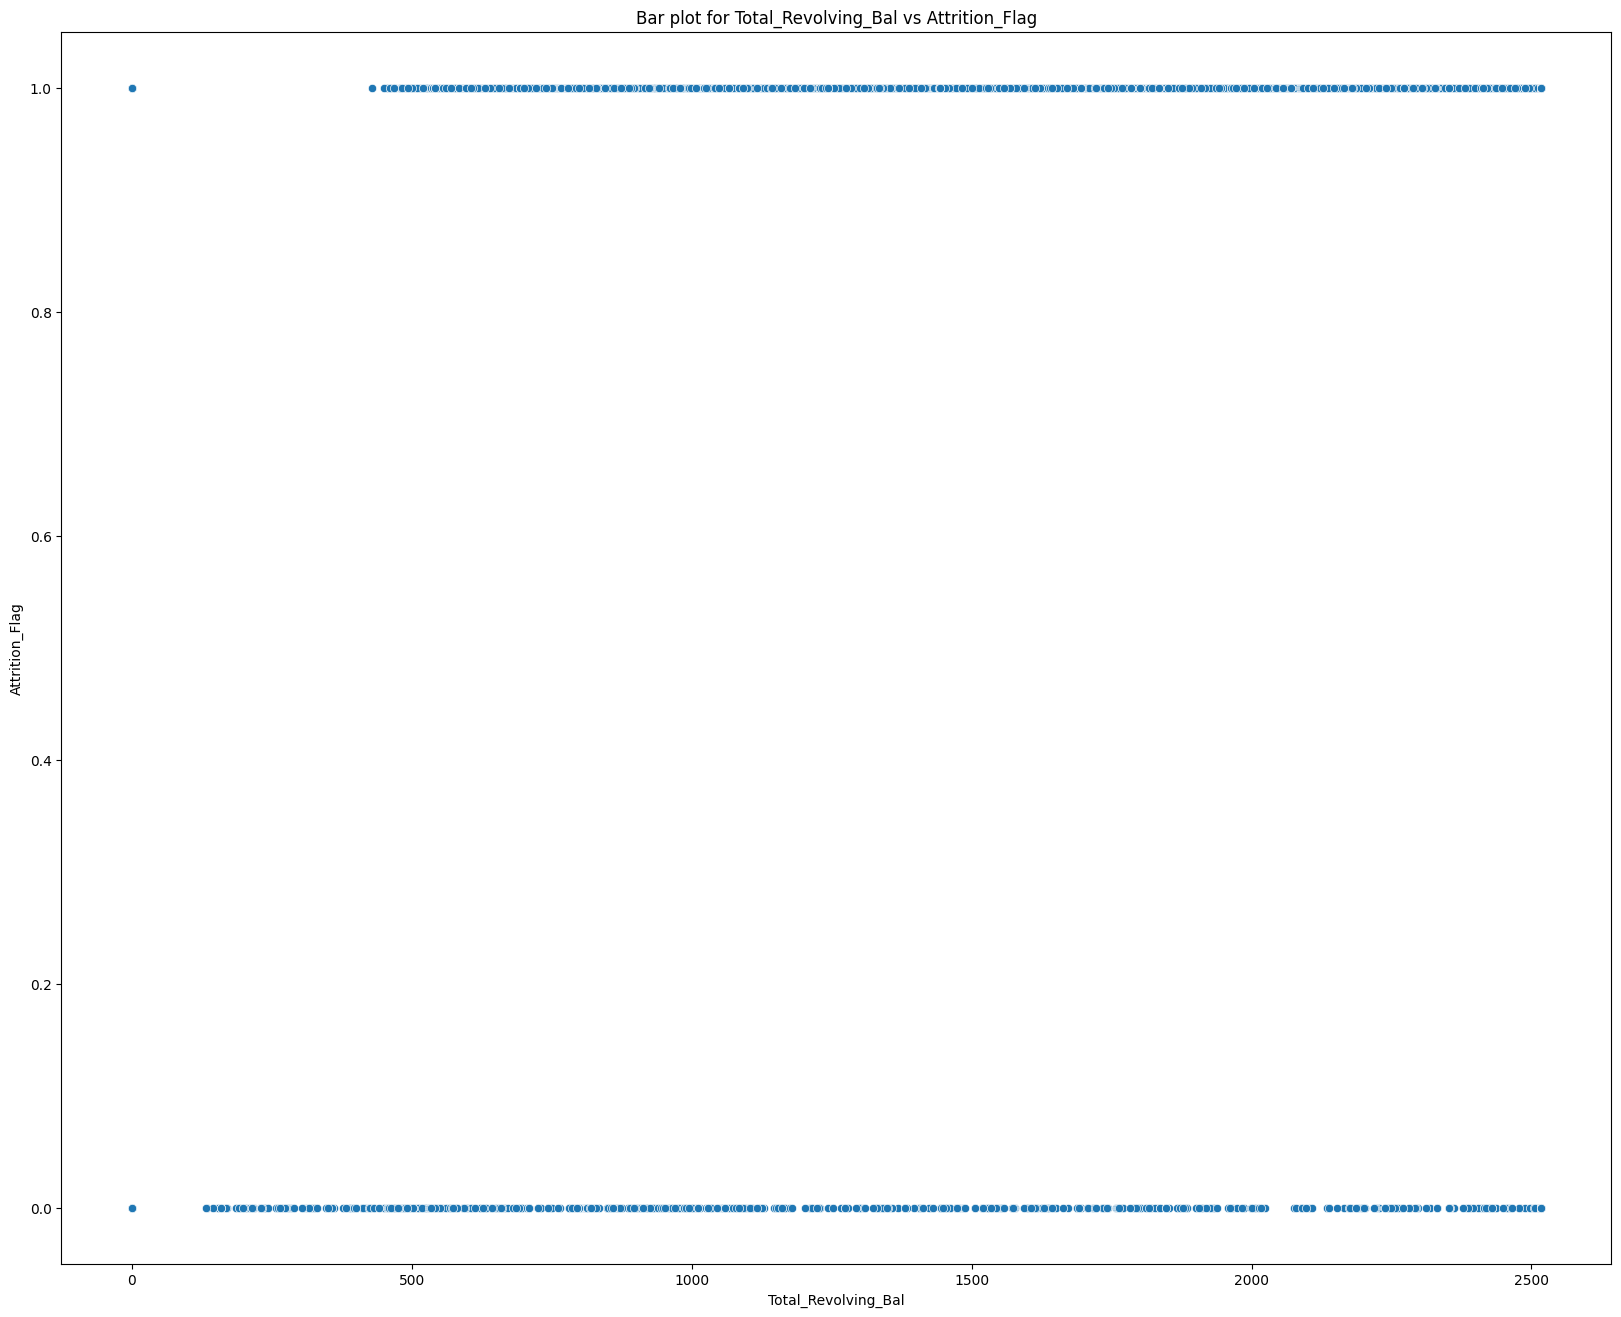

In [ ]:
#---- شاید به نمودار پراکندی تبدیل بشه بهتر باشه
plt.figure(figsize=(20, 16))

sns.lineplot(x="Total_Revolving_Bal", y="Attrition_Flag", data=df_copy, estimator='sum')

# Invert y-axis
#plt.gca().invert_yaxis()

# Set plot title
plt.title('Bar plot for Total_Revolving_Bal vs Attrition_Flag')
plt.show()
# Assuming you have a DataFrame named 'df_copy' with columns 'Total_Revolving_Bal' and 'Attrition_Flag'

# # Create the line plot with logarithmic scales
# plt.figure(figsize=(20, 16))
# sns.lineplot(x="Total_Revolving_Bal", y="Attrition_Flag", data=df_copy, estimator='sum')

# # Set logarithmic scales for both axes
# #plt.xscale('log')
# plt.yscale('log')

# # Set plot title
# plt.title('Line plot for Total_Revolving_Bal vs Attrition_Flag (Logarithmic Scales)')

# # Show the plot
# plt.show()

Text(0.5, 1.0, 'Bar plot for Avg_Open_To_Buy vs Attrition_Flag')

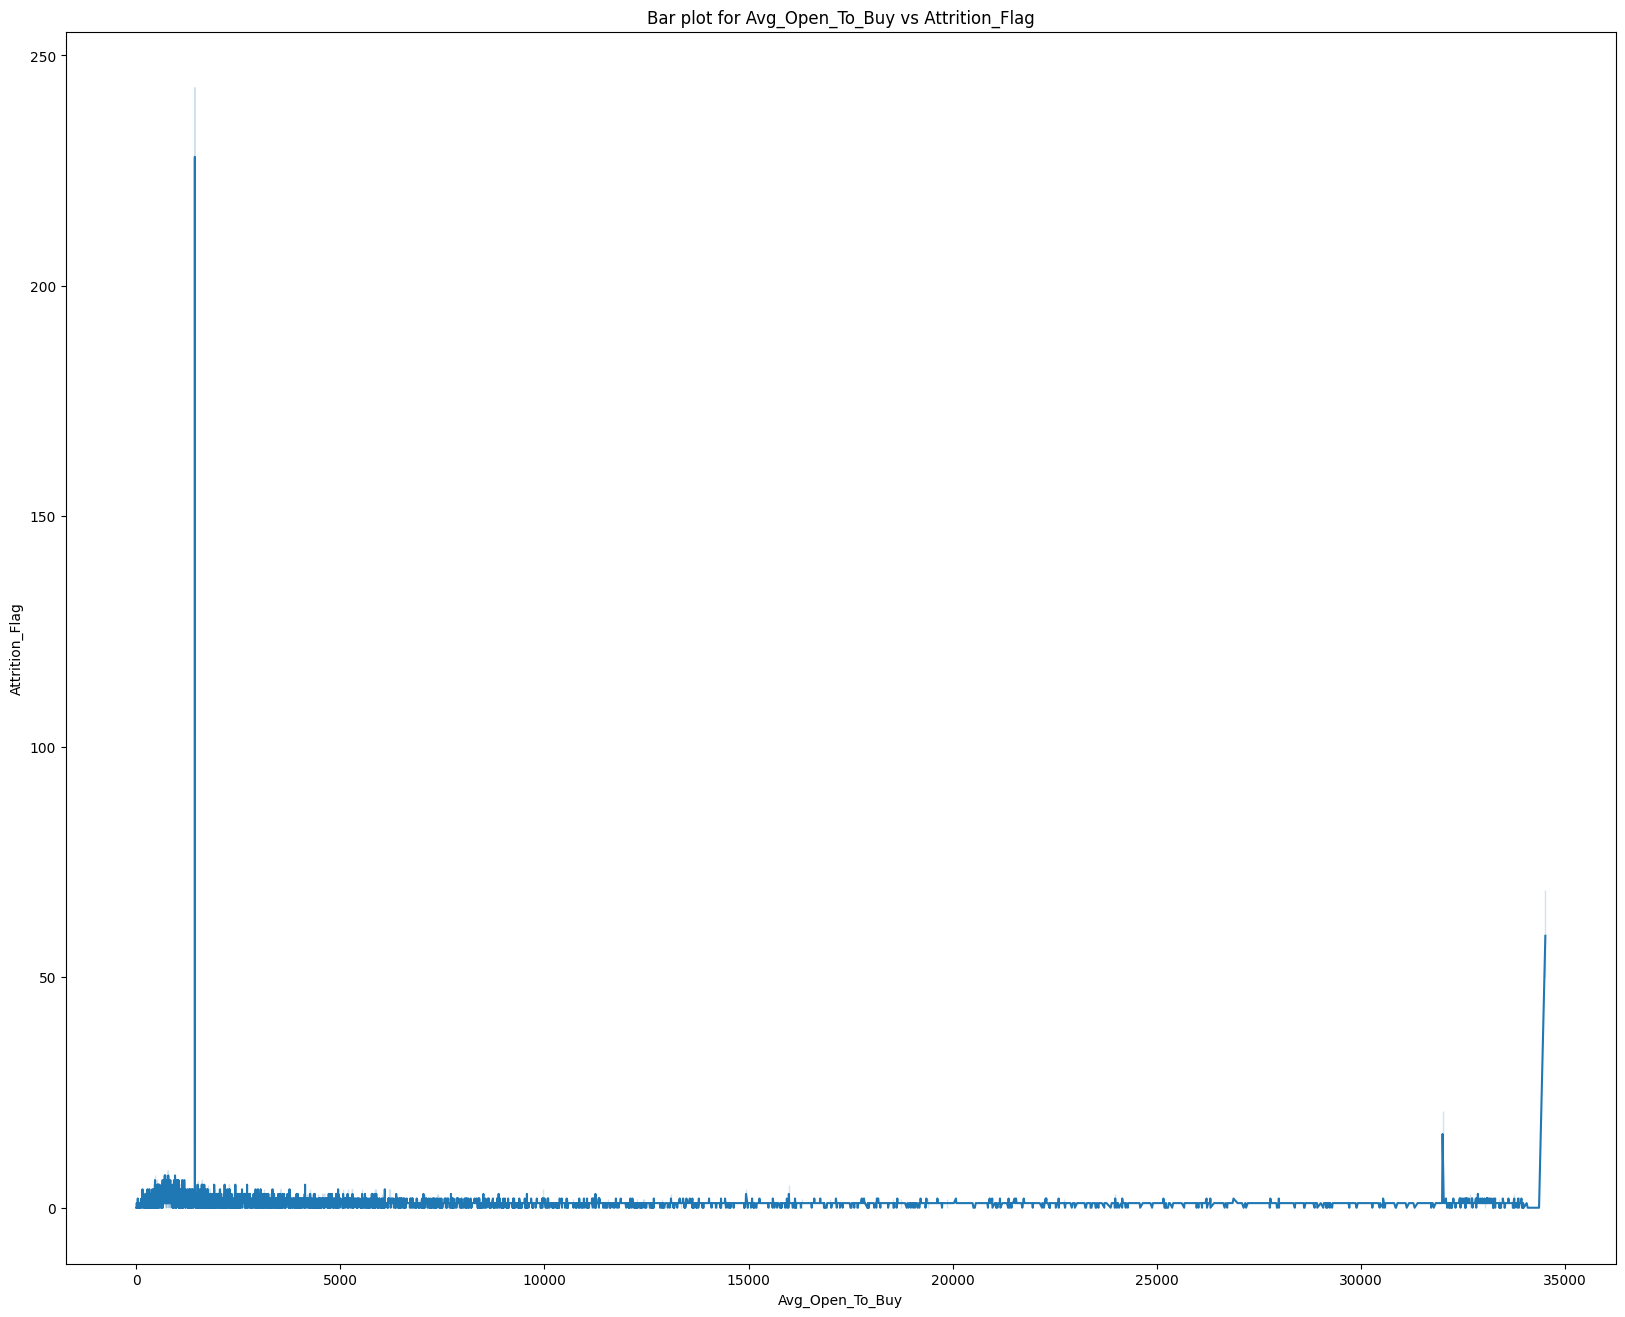

In [ ]:
#---- شاید به نمودار پراکندی تبدیل بشه بهتر باشه
plt.figure(figsize=(20, 16))

sns.lineplot(x="Avg_Open_To_Buy", y="Attrition_Flag", data=df_copy, estimator='sum', ci=None)

# Invert y-axis
#plt.gca().invert_yaxis()

# Set plot title
plt.title('Bar plot for Avg_Open_To_Buy vs Attrition_Flag')

<ipython-input-36-8d07dd4b48eb>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Total_Trans_Amt', y='Attrition_Flag', data=df_copy, estimator='sum', ci=None, palette='Set2')
<ipython-input-36-8d07dd4b48eb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total_Trans_Amt', y='Attrition_Flag', data=df_copy, estimator='sum', ci=None, palette='Set2')


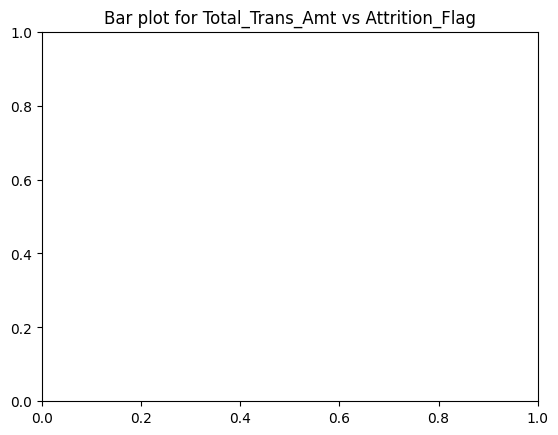

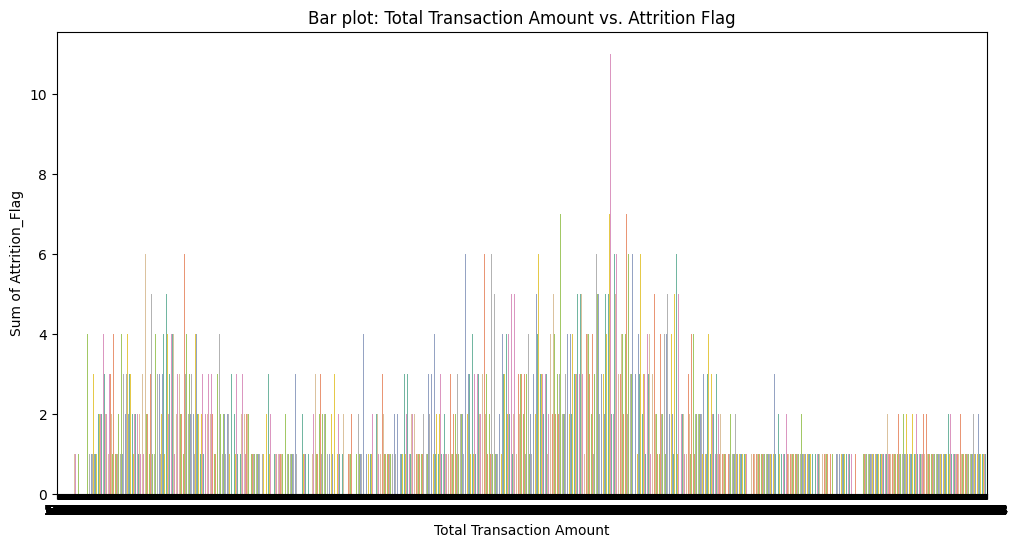

In [ ]:
#----
plt.figure(figsize=(20, 16))

sns.lineplot(x="Total_Amt_Chng_Q4_Q1", y="Attrition_Flag", data=df_copy, estimator='sum',ci=None)

# Invert y-axis
#plt.gca().invert_yaxis()

# Set plot title
plt.title('Bar plot for Total_Amt_Chng_Q4_Q1 vs Attrition_Flag')
plt.show()
#----
# plt.figure(figsize=(20, 16))
# #sns.histplot(x='Total_Trans_Amt', data=df_copy, bins=20, kde=True)    #برای تعداد تکرار مناسبه
# sns.barplot(x="Total_Trans_Amt", y="Attrition_Flag", data=df_copy, estimator='sum',ci=None)

# # Invert y-axis
# #plt.gca().invert_yaxis()

# Set plot title
#plt.title('Bar plot for Total_Trans_Amt vs Attrition_Flag')
# Create the bar plot
# plt.figure(figsize=(12, 6))  # Adjust the figsize as needed
# sns.barplot(x='Total_Trans_Amt', y='Attrition_Flag', data=df_copy, estimator='sum', ci=None, palette='Set2')

# # Customize plot labels and title
# plt.xlabel('Total Transaction Amount')
# plt.ylabel('Sum of Attrition_Flag')
# plt.title('Bar plot: Total Transaction Amount vs. Attrition Flag')

# # Show the plot
# plt.show()

# Group by 'Total_Trans_Amt' and calculate the sum of 'Attrition_Flag'
#grouped_data = df_copy.groupby('Total_Trans_Amt')['Attrition_Flag'].sum().reset_index()

# Create the line chart
# plt.figure(figsize=(10, 6))
# sns.lineplot(x='Total_Trans_Amt', y='Attrition_Flag', data=grouped_data)

# # Customize plot labels and title
# plt.xlabel('Total Transaction Amount')
# plt.ylabel('Sum of Attrition_Flag')
# plt.title('Line chart: Total Transaction Amount vs. Attrition Flag')

# # Show the plot
# plt.show()
# Create the line chart
# Create the line chart
# Create the line chart


<ipython-input-37-8926920a3740>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="Total_Trans_Ct", y="Attrition_Flag", data=df_copy, estimator='sum', ci=None)


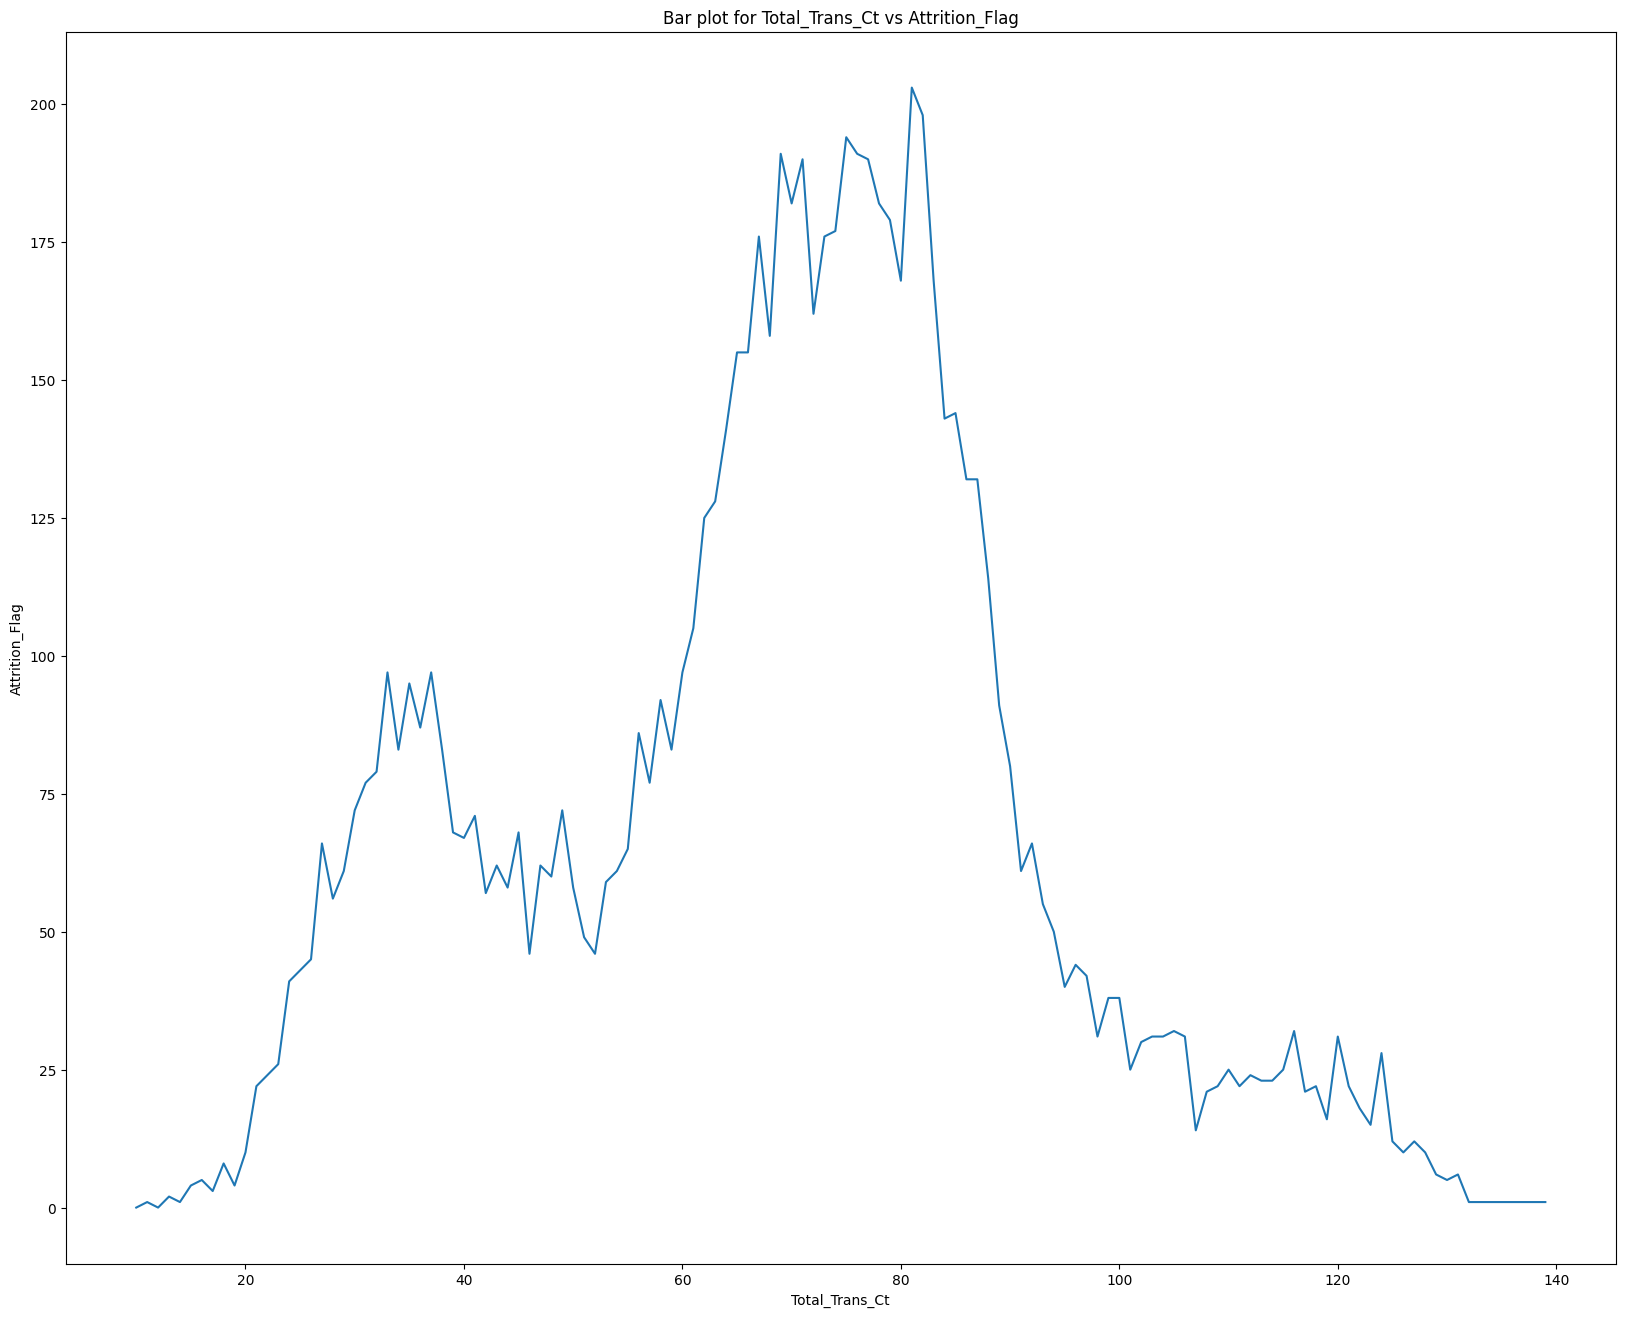

In [ ]:
#----
plt.figure(figsize=(20, 16))

sns.lineplot(x="Total_Trans_Ct", y="Attrition_Flag", data=df_copy, estimator='sum', ci=None)

# Invert y-axis
#plt.gca().invert_yaxis()

# Set plot title
plt.title('Bar plot for Total_Trans_Ct vs Attrition_Flag')
plt.show()

<ipython-input-40-9eeea286e174>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="Total_Ct_Chng_Q4_Q1", y="Attrition_Flag", data=df_copy, estimator='sum', ci=None)


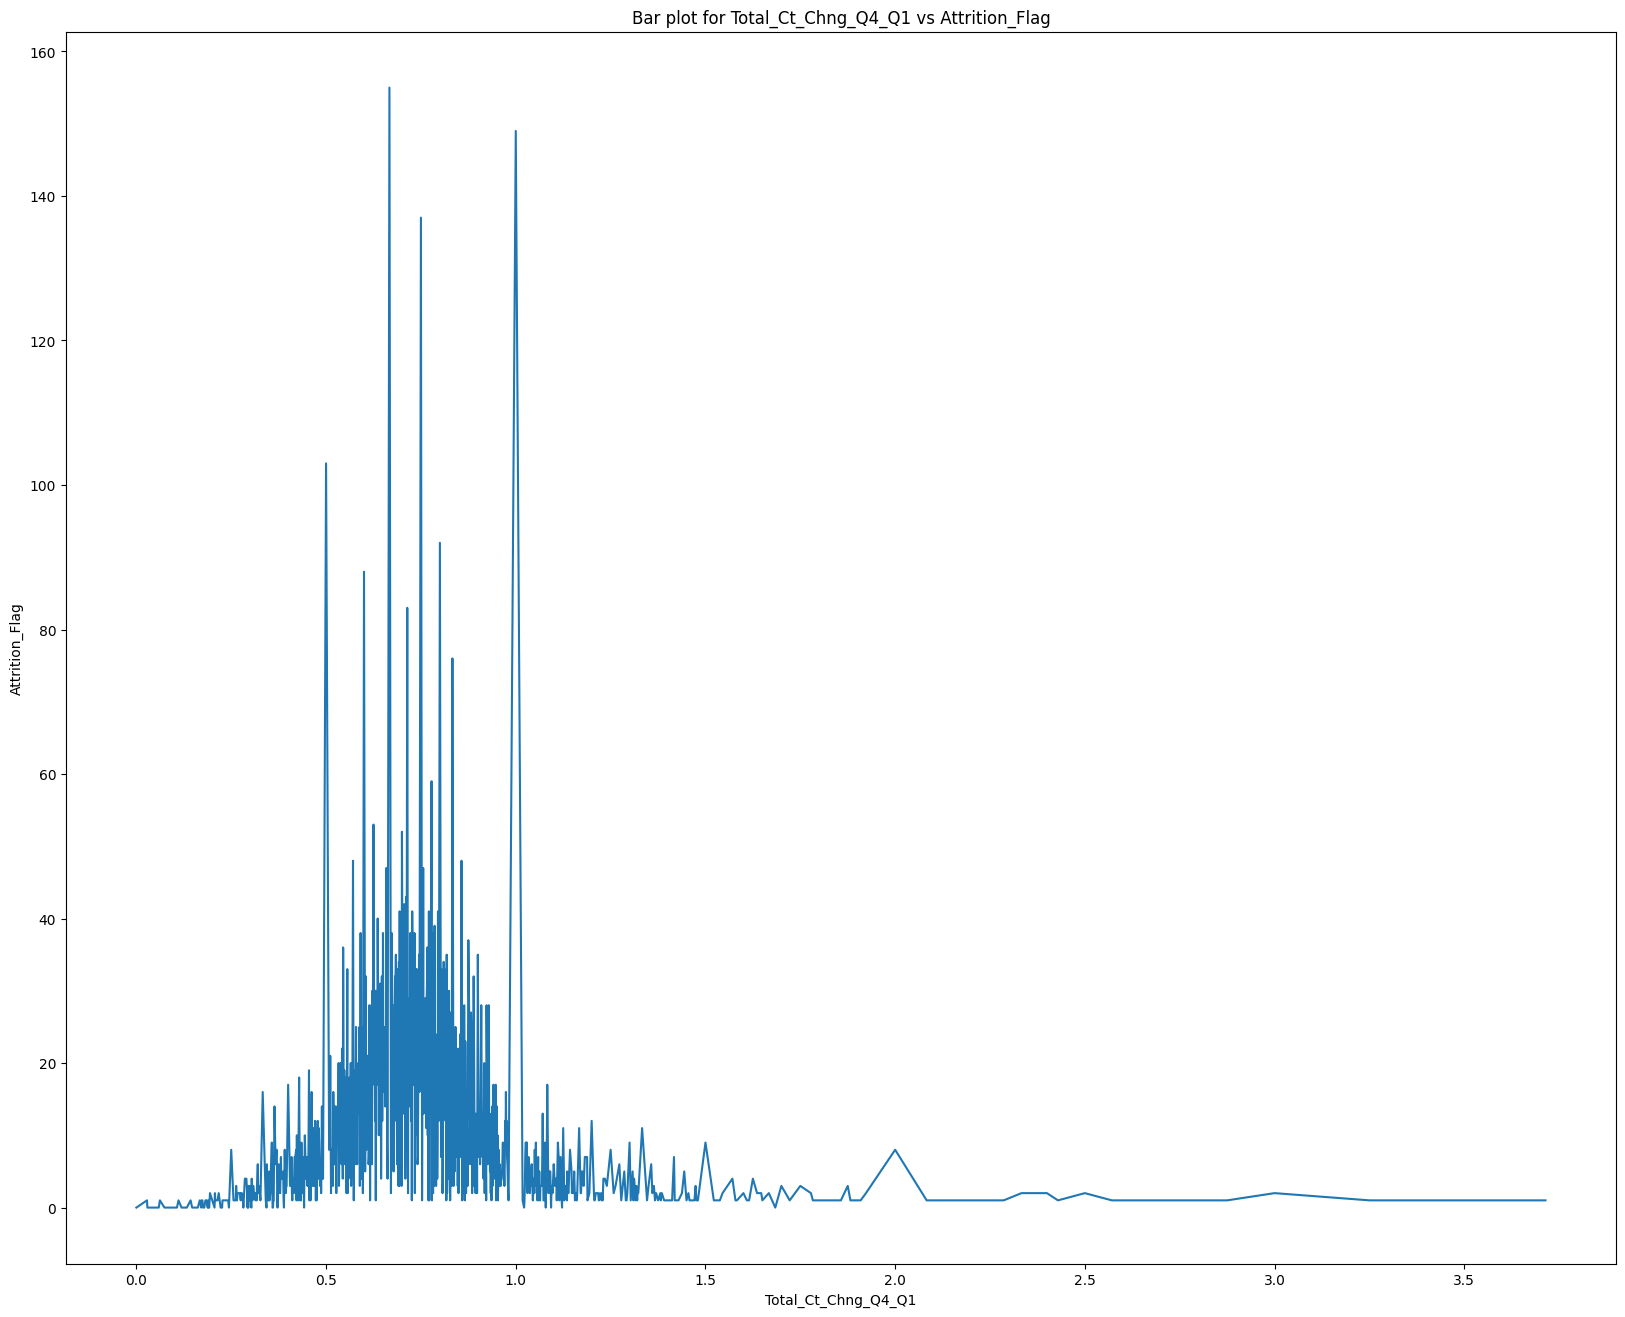

In [ ]:
plt.figure(figsize=(20, 16))

sns.lineplot(x="Total_Ct_Chng_Q4_Q1", y="Attrition_Flag", data=df_copy, estimator='sum', ci=None)

# Invert y-axis
#plt.gca().invert_yaxis()

# Set plot title
plt.title('Bar plot for Total_Ct_Chng_Q4_Q1 vs Attrition_Flag')
plt.show()

<ipython-input-39-44897bd685b9>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="Avg_Utilization_Ratio", y="Attrition_Flag", data=df_copy, estimator='sum', ci=None)


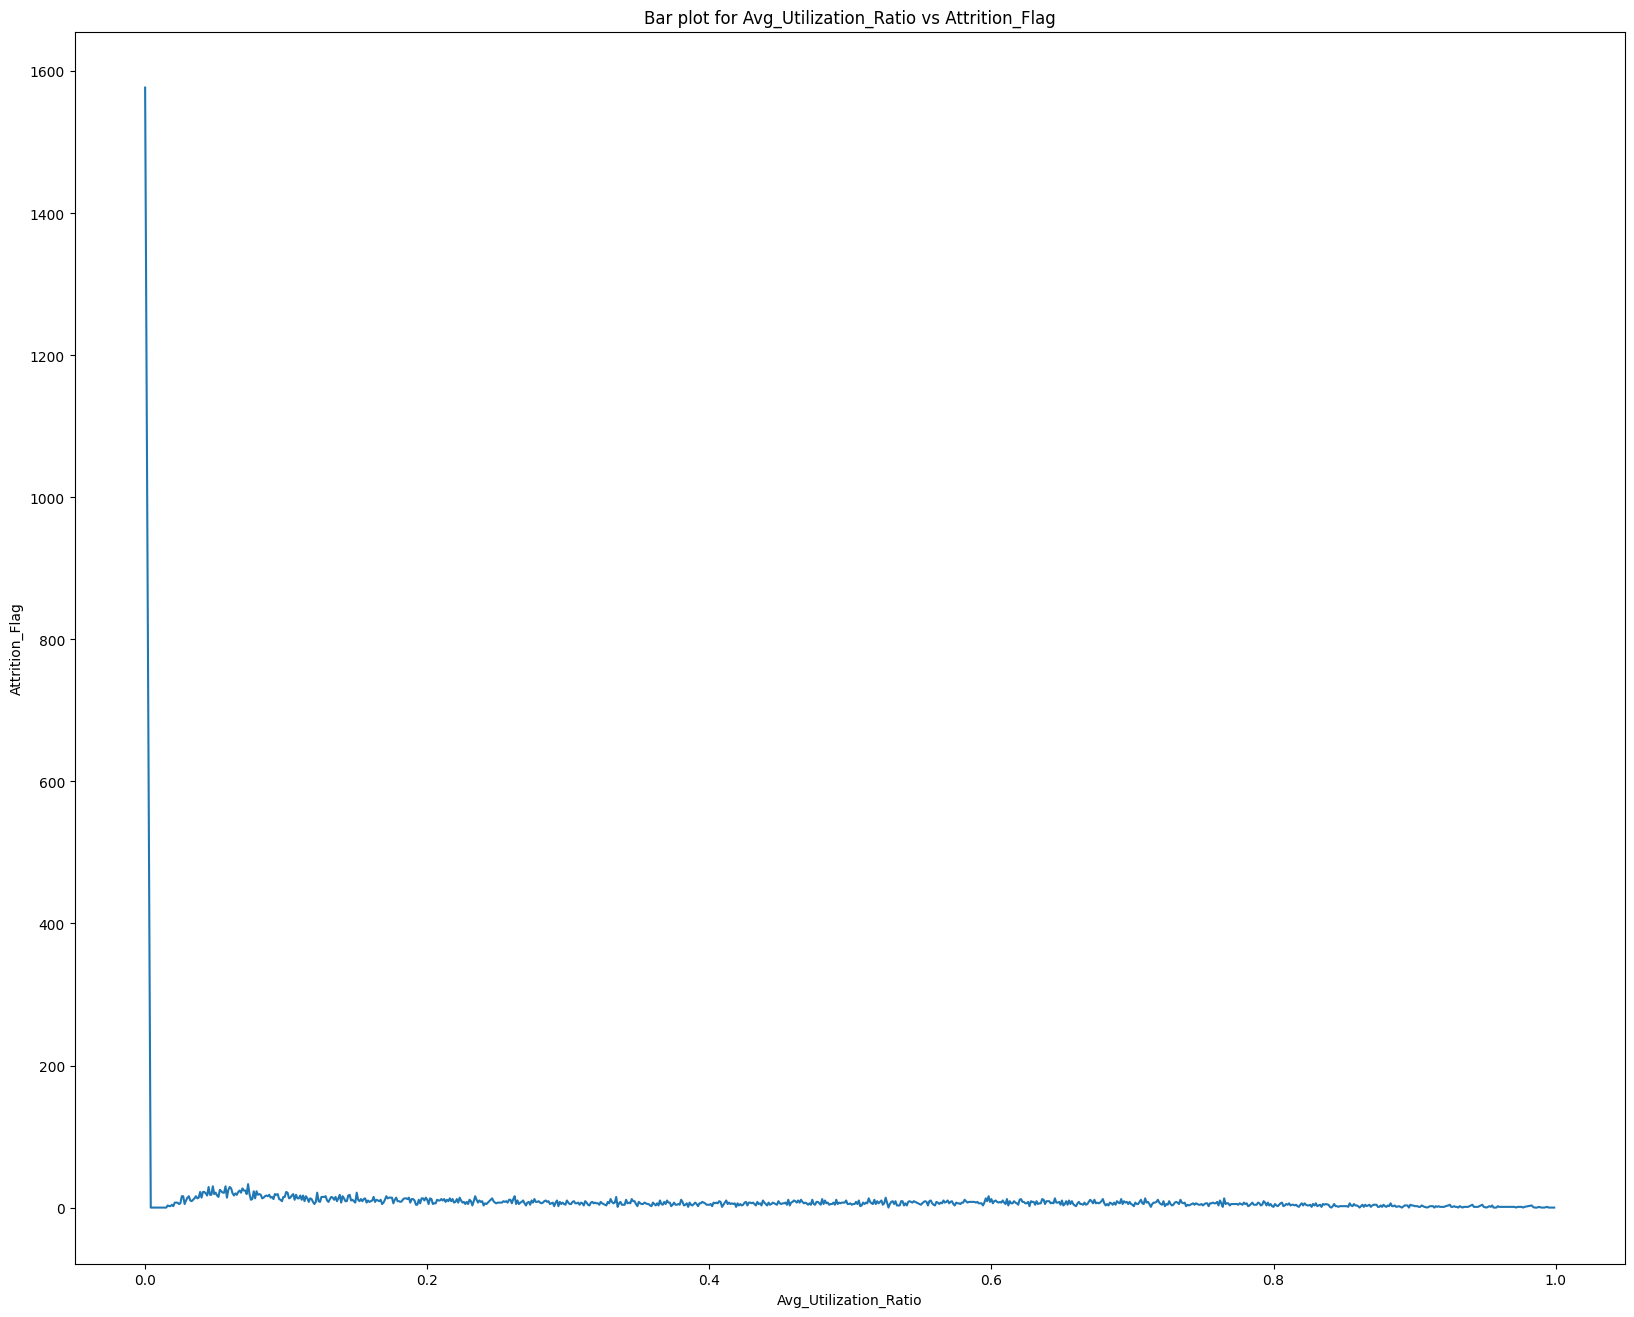

In [ ]:
plt.figure(figsize=(20, 16))

sns.lineplot(x="Avg_Utilization_Ratio", y="Attrition_Flag", data=df_copy, estimator='sum', ci=None)

# Invert y-axis
#plt.gca().invert_yaxis()

# Set plot title
plt.title('Bar plot for Avg_Utilization_Ratio vs Attrition_Flag')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Initialize MinMaxScaler
scaler = MinMaxScaler()
columns = df_copy.columns[:]
columns = columns.delete(columns.get_loc('Attrition_Flag'))
# Scale the DataFrame
df_scaled = pd.DataFrame(scaler.fit_transform(df_copy[columns]), columns=columns)

# Add 'Attrition_Flag' to the scaled DataFrame
df_scaled['Attrition_Flag'] = df_copy['Attrition_Flag']
#fig, axs = plt.subplots(len(columns) // 7, figsize=(10, 12))  # Adjust figsize as needed

#y_cols = np.array(columns)[None, :]
# Assuming columns contains names of all columns
df_scaled['column_category'] = df_scaled.columns[0]  # Initialize with first column
for i in range(1, len(df_scaled)):
    df_scaled.loc[i, 'column_category'] = columns[i-1]  # Assign category based on column index


# Use the categorical variable for y
sns.catplot(df_scaled, kind="bar", x='Attrition_Flag', y='column_category', col=columns, height=4, aspect=.5)

#sns.barplot(df_scaled, x='Attrition_Flag', y=x_data, estimator="sum", errorbar=None)
#ax.bar_label(ax.containers[0], fontsize=10);

#sns.barplot(df_scaled, x=columns, y='Attrition_Flag', hue='Attrition_Flag')
"""
# Create a figure
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust figsize as needed

# Create a barplot with melted data (optional, explained later)
# sns.barplot(x='Attrition_Flag', y='variable', hue='column', data=df_scaled.melt(id_vars='Attrition_Flag', var_name='column', value_name='variable'))

# Create a stacked barplot
sns.barplot(x='Attrition_Flag', y=y_cols[0], data=df_scaled, label=y_cols[0])  # Plot the first column

# Loop and stack remaining columns
for col in y_cols[1:]:
    sns.barplot(x='Attrition_Flag', y=col, data=df_scaled, label=col, bottom=df_scaled[y_cols[0:y_cols.tolist().index(col)]].sum(axis=1))

# Customize the plot
ax.set_title("Attrition Flag vs. All Scaled Columns")
ax.set_xlabel('Attrition Flag')
ax.set_ylabel('Scaled Value')
ax.legend(title='Columns')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
"""
# Display the plot
plt.tight_layout()
plt.show()

grouped_data = df.groupby('Months_on_book')['Attrition_Flag'].sum().reset_index()

# Create the bar plot
plt.figure(figsize=(8, 4))  # Adjust the figsize as needed
sns.barplot(x='Months_on_book', y='Attrition_Flag', data=grouped_data)

# Customize plot labels and title
plt.xlabel('Months_on_book')
plt.ylabel('Sum of Attrition_Flag')
plt.title('Bar plot: Sum of Attrition_Flag vs Months_on_book')

# Show the plot
plt.show()

In [ ]:
df_scaled.columns

Index(['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level',
       'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Attrition_Flag'],
      dtype='object')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


X = df_scaled.drop(['Credit_Limit', 'Attrition_Flag','Avg_Open_To_Buy'], axis=1)
y = df_scaled['Credit_Limit']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=22)

# Initialize and train the linear regression model
linreg = LinearRegression()
linreg.fit(X_train, Y_train)

# Make predictions
Y_pred = linreg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 0.030923326470877418
R-squared: 0.5825789898860488


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming 'y_true' contains the actual target values and 'y_pred' contains the predicted values
mae = mean_absolute_error(Y_test, Y_pred)
rmse = mean_squared_error(Y_test, Y_pred, squared=False)  # RMSE is the square root of MSE
n = len(Y_test)  # Number of samples
p = X.shape[1]  # Number of features
r2 = r2_score(Y_test, Y_pred)

# Adjusted R-squared
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Adjusted R-squared: {adj_r2:.4f}")


Mean Absolute Error (MAE): 0.1279
Root Mean Squared Error (RMSE): 0.1759
Adjusted R-squared: 0.5802


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:

# Scale the DataFrame
df_scaled = pd.DataFrame(scaler.fit_transform(df_copy[columns]), columns=columns)

# Add 'Attrition_Flag' to the scaled DataFrame
df_scaled['Attrition_Flag'] = df_copy['Attrition_Flag']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

X = df_scaled.drop('Attrition_Flag', axis=1)
y = df_scaled['Attrition_Flag']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model using the training data
solver = 'lbfgs'
LogReg = LogisticRegression(solver=solver)
LogReg.fit(X_train, y_train)
# Evaluate model performance on the testing set
y_pred = LogReg.predict(X_test)
# Classification Report
print(classification_report(y_test, y_pred))
# Confusion Matrix
print(confusion_matrix(y_test, y_pred))
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC Score: {roc_auc:.4f}")

              precision    recall  f1-score   support

           0       0.79      0.49      0.60       496
           1       0.91      0.97      0.94      2543

    accuracy                           0.90      3039
   macro avg       0.85      0.73      0.77      3039
weighted avg       0.89      0.90      0.88      3039

[[ 242  254]
 [  65 2478]]
Accuracy: 0.8950
ROC AUC Score: 0.7312


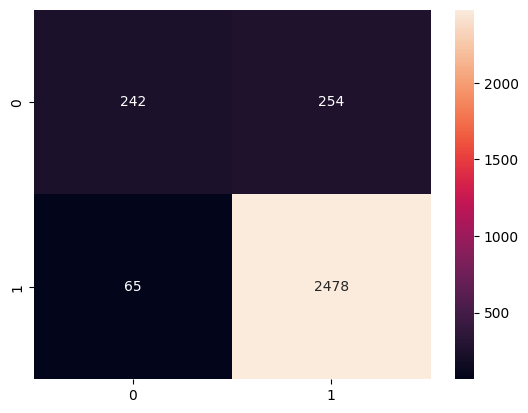

In [ ]:
import seaborn as sns

# Get confusion matrix from the code snippet
confusion_matrix_output = confusion_matrix(y_test, y_pred)

# Create a confusion matrix heatmap
sns.heatmap(confusion_matrix_output, annot=True, fmt="d")
#sns.title("Confusion Matrix")
#sns.xlabel("Predicted Label")sns.ylabel("True Label")
plt.show()

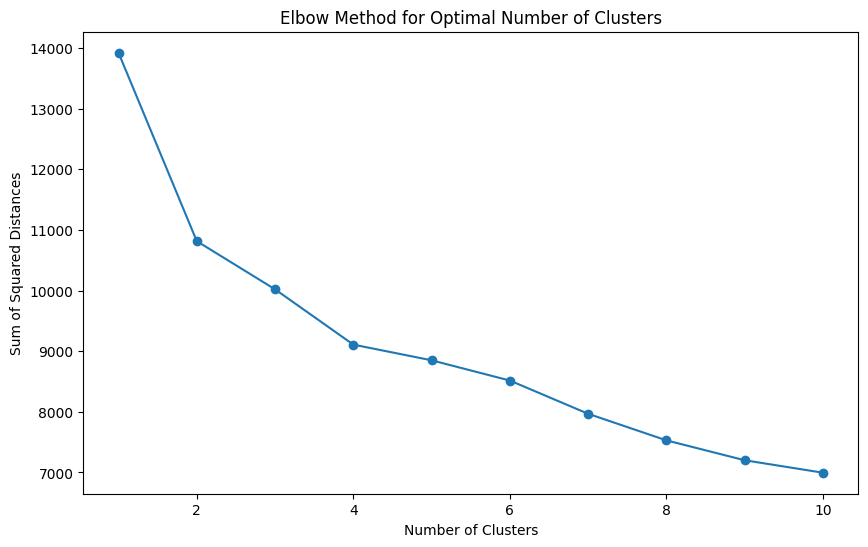

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

# Select relevant features for clustering
features = ['Customer_Tenure_Years', 'Avg_Trans_Amt', 'Total_Trans_per_Month', 'Credit_Utilization_Ratio', 'Avg_Contacts_per_Month']

# # Standardize the features
# scaler = StandardScaler()
# scaled_features = scaler.fit_transform(df_scaled[features])

# Determine the optimal number of clusters using the Elbow Method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler  # Assuming your data is already scaled (df_scaled)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# Get logistic regression predictions (probability of churn)
y_proba_train = LogReg.predict_proba(X_train)[:, 1]  # Probability of churn class

# Combine predictions with features for clustering (if needed)
# features_to_cluster = ['Customer_Age', 'Income_Category', 'Total_Relationship_Count']  # Example
# X_train_cluster = pd.concat([X_train[features_to_cluster], pd.DataFrame(y_proba_train, columns=['Churn_Probability'])], axis=1)

# Use the same scaling for clustering data (if applicable)
scaler = StandardScaler()  # Assuming your data is already scaled
X_train_cluster = scaler.fit_transform(X_train)

# Get logistic regression predictions (probability of churn)
y_proba_train = LogReg.predict_proba(X_train)[:, 1]  # Probability of churn class

# Combine predictions with features for clustering (if needed)
# Consider features relevant to customer segmentation
features_to_cluster = ['Customer_Age', 'Income_Category', 'Total_Relationship_Count']  # Example
X_train_cluster = pd.concat([X_train[features_to_cluster], pd.DataFrame(y_proba_train, columns=['Churn_Probability'])], axis=1)

# Apply PCA to reduce dimensionality (assuming 2D visualization)
pca = PCA(n_components=2)
X_train_cluster_reduced = pca.fit_transform(X_train_cluster)

# Perform KMeans clustering on the reduced-dimensionality data
kmeans = KMeans(n_clusters=2, random_state=42)  # Replace 3 with your chosen number
kmeans.fit(X_train_cluster_reduced)

# Get cluster labels for each data point
cluster_labels = kmeans.labels_

# Visualize clusters in 2D space
plt.scatter(X_train_cluster_reduced[:, 0], X_train_cluster_reduced[:, 1], c=cluster_labels)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Customer Segmentation with Logistic Regression Predictions (PCA)')
plt.show()

# (Optional) Analyze cluster characteristics based on the original f

ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler  # Assuming your data is already scaled (df_scaled)
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming you have already performed train-test split (X_train, X_test)

# Select features for clustering (if needed)
# features_to_cluster = ['feature1', 'feature2', ...]  # Choose relevant features
# X_train_cluster = X_train[features_to_cluster]

# Use the same scaling for clustering data (if applicable)
scaler = StandardScaler()  # Assuming your data is already scaled
X_train_cluster = scaler.fit_transform(X_train)

# Determine the optimal number of clusters (consider Elbow Method or Silhouette Analysis)
# Here, we'll assume 3 clusters for demonstration

kmeans = KMeans(n_clusters=3, random_state=42)  # Replace 3 with your chosen number
kmeans.fit(X_train_cluster)

# Get cluster labels for each data point
cluster_labels = kmeans.labels_

# Visualize clusters using scatter plot (2D features)
if len(X_train.columns) == 2:  # Assuming 2D features for visualization
    plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=cluster_labels)
    plt.xlabel(X_train.columns[0])
    plt.ylabel(X_train.columns[1])
    plt.title('Customer Segmentation using KMeans Clustering')
    plt.show()
else:
    print("Visualization limited to 2D features. Consider dimensionality reduction techniques for higher dimensions.")

# (Optional) Analyze cluster characteristics based on the original features
# Use cluster_labels to identify data points belonging to each cluster in X_train

# Remember to replace assumptions (number of clusters, features) with your specific analysis


In [ ]:
# Derive new features: customer tenure in years and Credit Utilization Ratio
# Derive customer tenure in years
df['Customer_Tenure_Years'] = df['Months_on_book'] / 12

# Credit Utilization Ratio
df['Credit_Utilization_Ratio'] = df['Total_Revolving_Bal'] / df['Credit_Limit']
print('New features have been derived.')
print(df[['Customer_Tenure_Years', 'Credit Utilization Ratio']].head())

In [ ]:
!pip install ydata-profiling

In [ ]:
!pip install pydantic-settings

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import ydata_profiling as pp
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Assuming 'df' is your DataFrame
profile = pp.ProfileReport(df, title="Pandas Profiling Report")

# Export to an HTML file
profile.to_file("my_report_profiling.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]